In [118]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error, r2_score, make_scorer
from sklearn.tree import DecisionTreeRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
import matplotlib.pyplot as plt
from sklearn import tree as tree_
import seaborn as sns
import pandas as pd
import numpy as np
import joblib

%matplotlib inline

In [2]:
bike_df = pd.read_csv('data/daily-bike-share.csv')
bike_df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,12/27/2012,1,1,12,0,4,1,2,0.254167,0.226642,0.652917,0.350133,247
727,728,12/28/2012,1,1,12,0,5,1,2,0.253333,0.255046,0.590000,0.155471,644
728,729,12/29/2012,1,1,12,0,6,0,2,0.253333,0.242400,0.752917,0.124383,159
729,730,12/30/2012,1,1,12,0,0,0,1,0.255833,0.231700,0.483333,0.350754,364


The data consists of the following columns:

- **instant**: A unique row identifier
- **dteday**: The date on which the data was observed - in this case, the data was collected daily; so there's one row per date.
- **season**: A numerically encoded value indicating the season (1:spring, 2:summer, 3:fall, 4:winter)
- **yr**: The year of the study in which the observation was made (the study took place over two years - year 0 represents 2011, and year 1 represents 2012)
- **mnth**: The calendar month in which the observation was made (1:January ... 12:December)
- **holiday**: A binary value indicating whether or not the observation was made on a public holiday)
- **weekday**: The day of the week on which the observation was made (0:Sunday ... 6:Saturday)
- **workingday**: A binary value indicating whether or not the day is a working day (not a weekend or holiday)
- **weathersit**: A categorical value indicating the weather situation (1:clear, 2:mist/cloud, 3:light rain/snow, 4:heavy rain/hail/snow/fog)
- **temp**: The temperature in celsius (normalized)
- **atemp**: The apparent ("feels-like") temperature in celsius (normalized)
- **hum**: The humidity level (normalized)
- **windspeed**: The windspeed (normalized)
- **rentals**: The number of bicycle rentals recorded.

In [3]:
# First convert the dteday feature from date to day, since we have separate features for year and month
bike_day = pd.DatetimeIndex(bike_df.dteday).day
bike_df['dteday'] = bike_day
bike_df.head(32)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,rentals
0,1,1,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331
1,2,2,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131
2,3,3,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120
3,4,4,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108
4,5,5,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82
5,6,6,1,0,1,0,4,1,1,0.204348,0.233209,0.518261,0.089565,88
6,7,7,1,0,1,0,5,1,2,0.196522,0.208839,0.498696,0.168726,148
7,8,8,1,0,1,0,6,0,2,0.165000,0.162254,0.535833,0.266804,68
8,9,9,1,0,1,0,0,0,1,0.138333,0.116175,0.434167,0.361950,54
9,10,10,1,0,1,0,1,1,1,0.150833,0.150888,0.482917,0.223267,41


In [4]:
features = ['temp', 'atemp', 'hum', 'windspeed']
bike_df[features + ['rentals']].describe()

,temp,atemp,hum,windspeed,rentals
count,731.000000,731.000000,731.000000,731.000000,731.000000
mean,0.495385,0.474354,0.627894,0.190486,848.176471
std,0.183051,0.162961,0.142429,0.077498,686.622488
min,0.059130,0.079070,0.000000,0.022392,2.000000
25%,0.337083,0.337842,0.520000,0.134950,315.500000
50%,0.498333,0.486733,0.626667,0.180975,713.000000
75%,0.655417,0.608602,0.730209,0.233214,1096.000000
max,0.861667,0.840896,0.972500,0.507463,3410.000000


In [5]:
del bike_df['yr']
del bike_df['atemp']

In [6]:
bike_df

,instant,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,rentals
0,1,1,1,1,0,6,0,2,0.344167,0.805833,0.160446,331
1,2,2,1,1,0,0,0,2,0.363478,0.696087,0.248539,131
2,3,3,1,1,0,1,1,1,0.196364,0.437273,0.248309,120
3,4,4,1,1,0,2,1,1,0.200000,0.590435,0.160296,108
4,5,5,1,1,0,3,1,1,0.226957,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27,1,12,0,4,1,2,0.254167,0.652917,0.350133,247
727,728,28,1,12,0,5,1,2,0.253333,0.590000,0.155471,644
728,729,29,1,12,0,6,0,2,0.253333,0.752917,0.124383,159
729,730,30,1,12,0,0,0,1,0.255833,0.483333,0.350754,364


For feature: TEMP


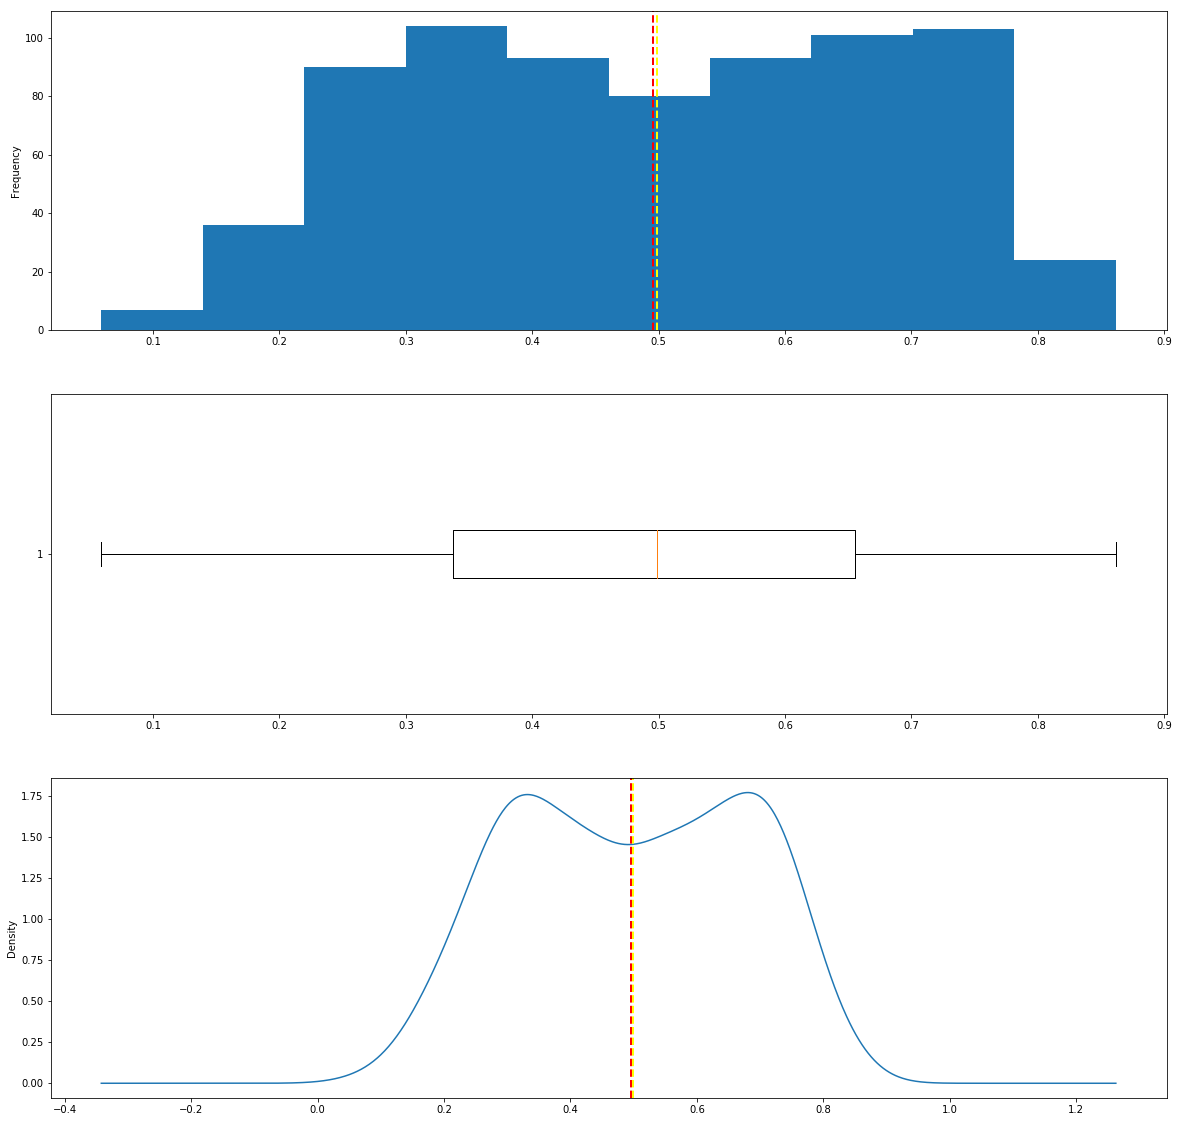

For feature: HUM


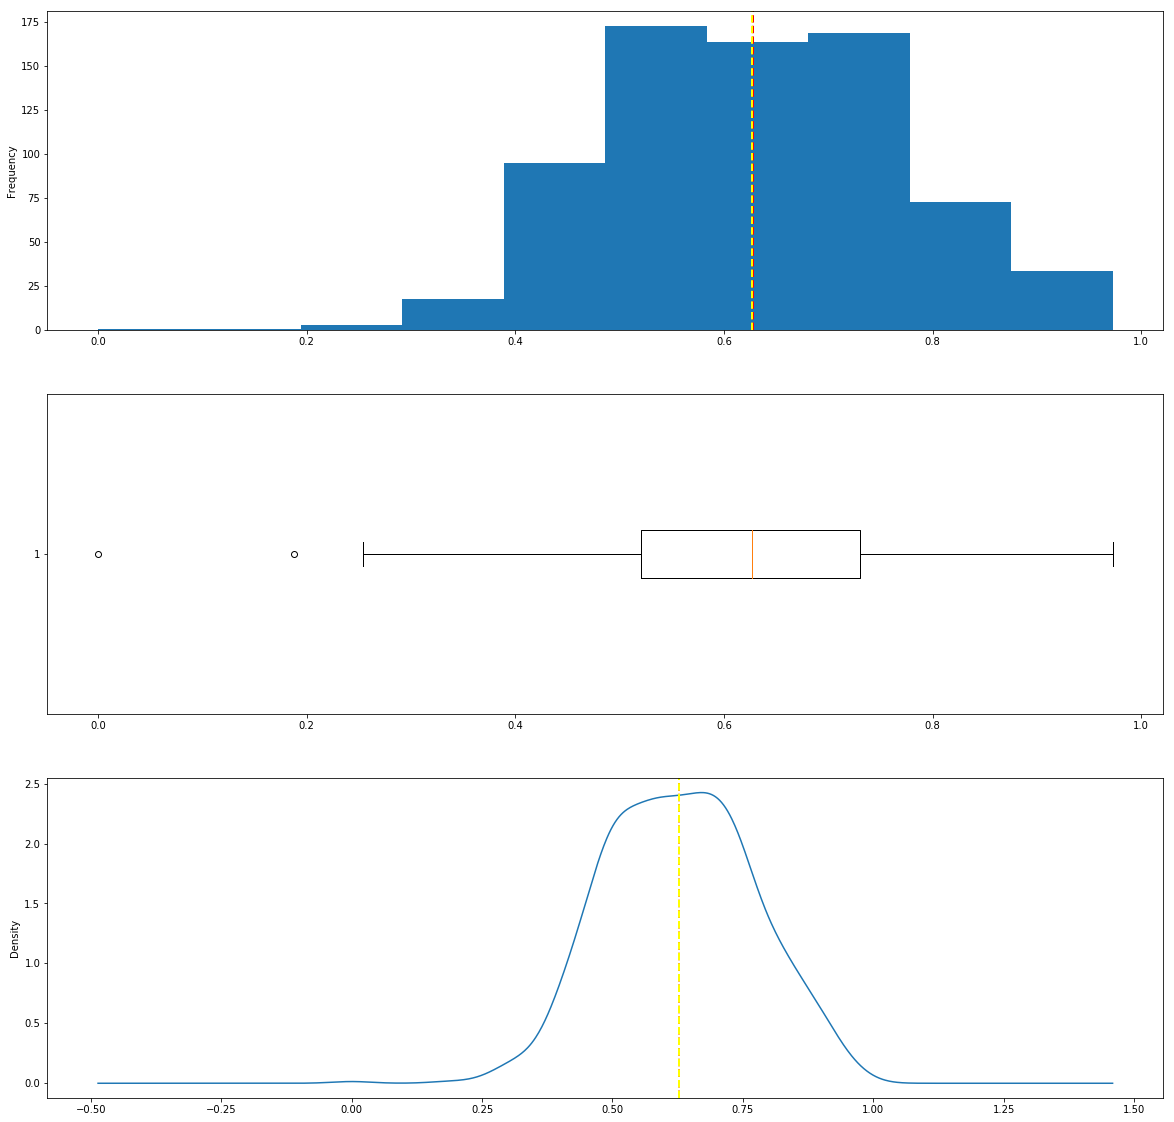

For feature: WINDSPEED


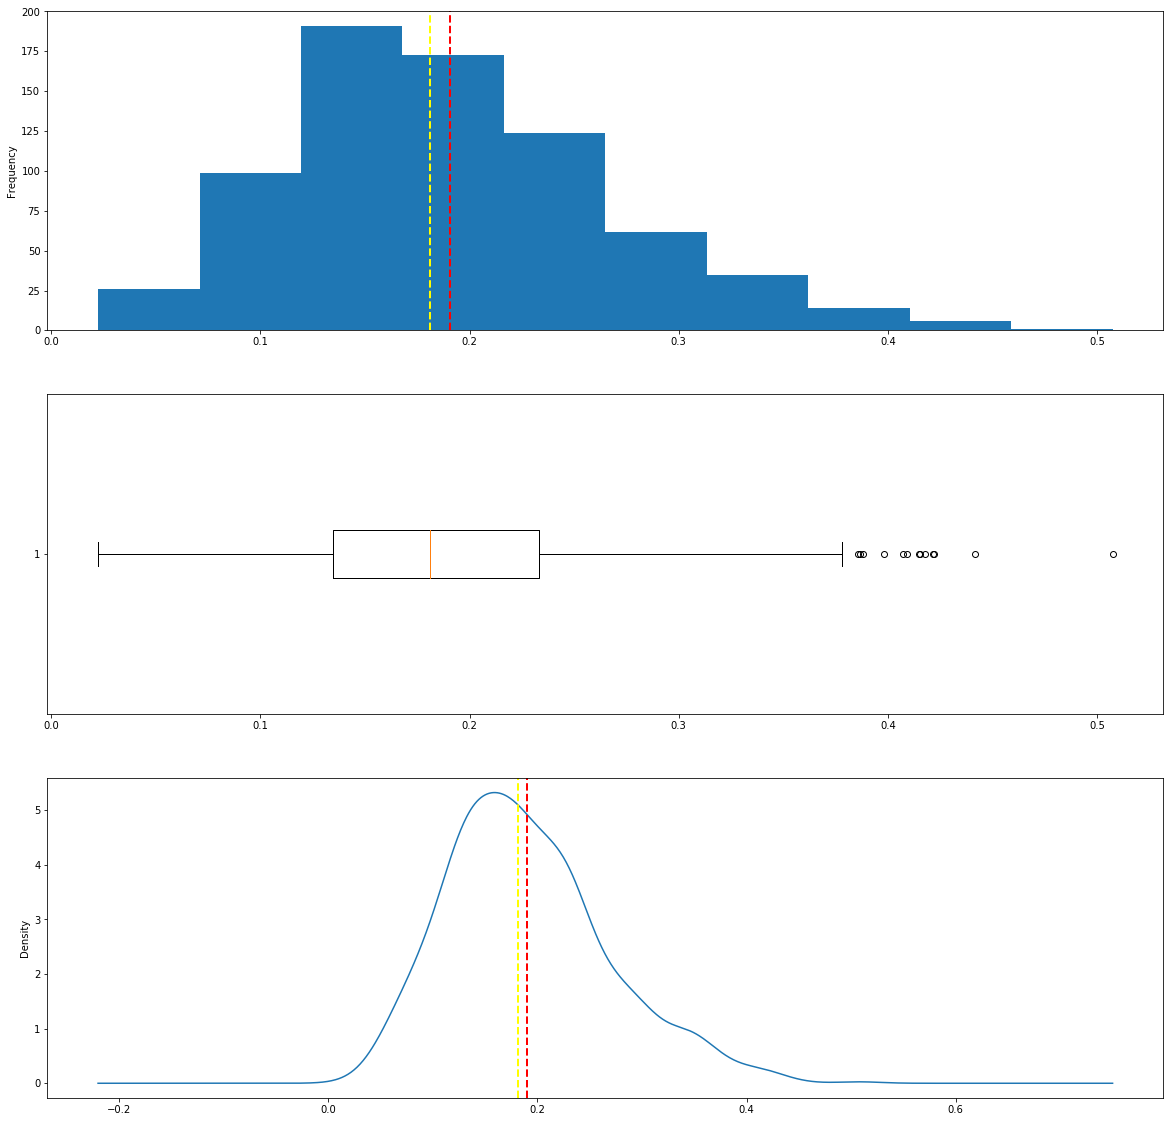

In [7]:
numerical_features = ['temp', 'hum', 'windspeed']
for feature in numerical_features:
    print('For feature:', feature.upper())
    fig, axis = plt.subplots(3, 1, figsize=(20, 20))
    
    # histogram on axis 0
    axis[0].hist(bike_df[feature])
    axis[0].set_ylabel('Frequency')
    
    # mean, median plot on axis 0
    axis[0].axvline(bike_df[feature].mean(), color='red', linestyle='dashed', linewidth=2)
    axis[0].axvline(bike_df[feature].median(), color='yellow', linestyle='dashed', linewidth=2)
    
    # box plot on axis 1
    axis[1].boxplot(bike_df[feature], vert=False)
    
    # density plot on axis 2
    axis[2] = bike_df[feature].plot.density()
    axis[2].axvline(bike_df[feature].mean(), color='red', linestyle='dashed', linewidth=2)
    axis[2].axvline(bike_df[feature].median(), color='yellow', linestyle='dashed', linewidth=2)
    
    plt.show()

For feature: HUM


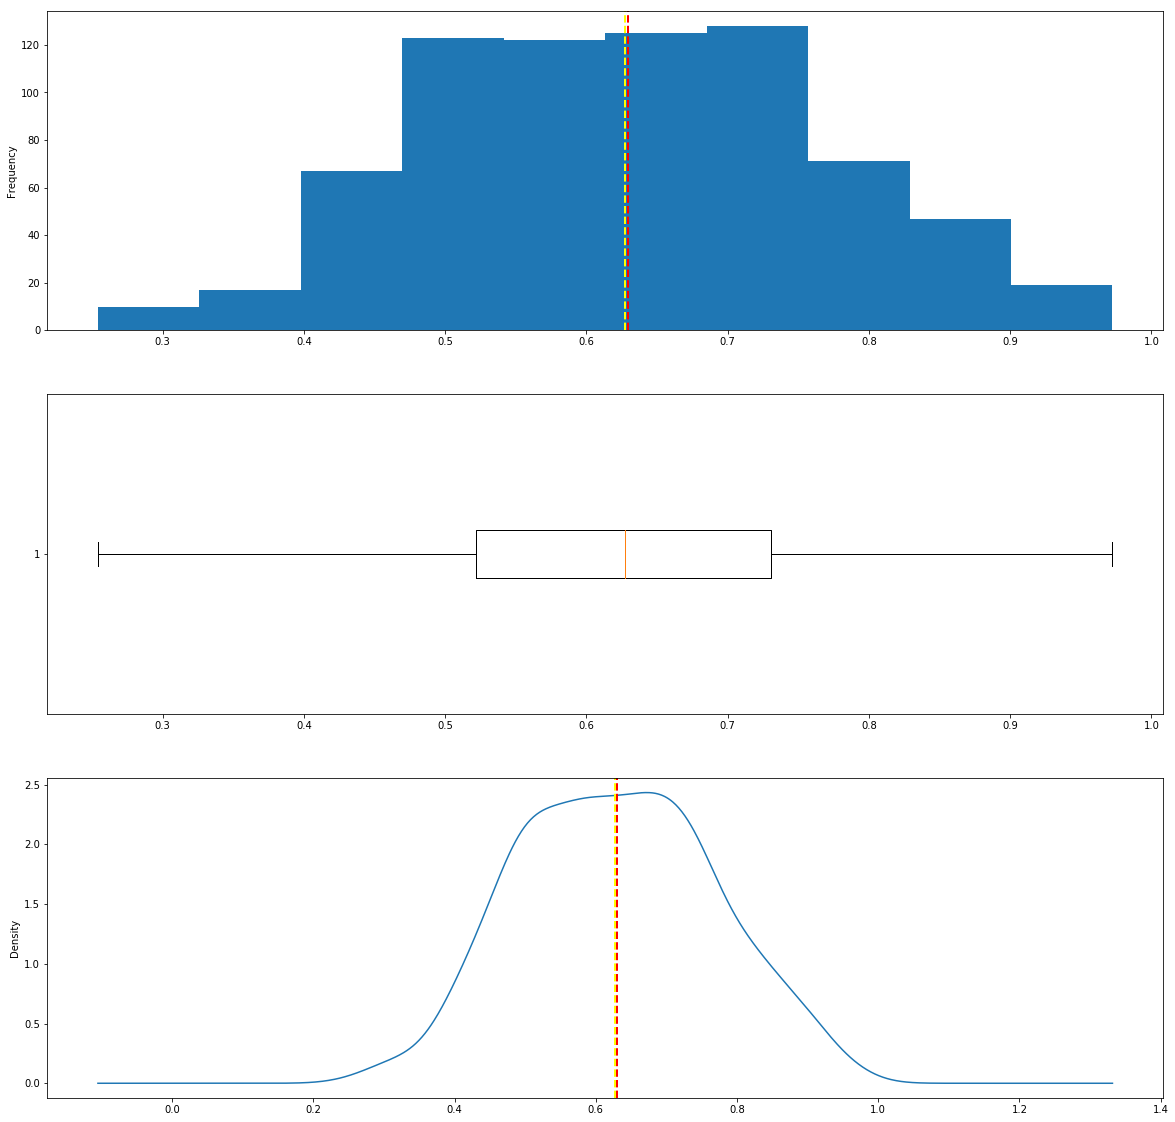

In [8]:
numerical_features = ['hum']
for feature in numerical_features:
    print('For feature:', feature.upper())
    fig, axis = plt.subplots(3, 1, figsize=(20, 20))
    
    # histogram on axis 0
    axis[0].hist(bike_df[feature][bike_df[feature]>0.2])
    axis[0].set_ylabel('Frequency')
    
    # mean, median plot on axis 0
    axis[0].axvline(bike_df[feature][bike_df[feature]>0.2].mean(), color='red', linestyle='dashed', linewidth=2)
    axis[0].axvline(bike_df[feature][bike_df[feature]>0.2].median(), color='yellow', linestyle='dashed', linewidth=2)
    
    # box plot on axis 1
    axis[1].boxplot(bike_df[feature][bike_df[feature]>0.2], vert=False)
    
    # density plot on axis 2
    axis[2] = bike_df[feature][bike_df[feature]>0.2].plot.density()
    axis[2].axvline(bike_df[feature][bike_df[feature]>0.2].mean(), color='red', linestyle='dashed', linewidth=2)
    axis[2].axvline(bike_df[feature][bike_df[feature]>0.2].median(), color='yellow', linestyle='dashed', linewidth=2)
    
    plt.show()

For feature: WINDSPEED


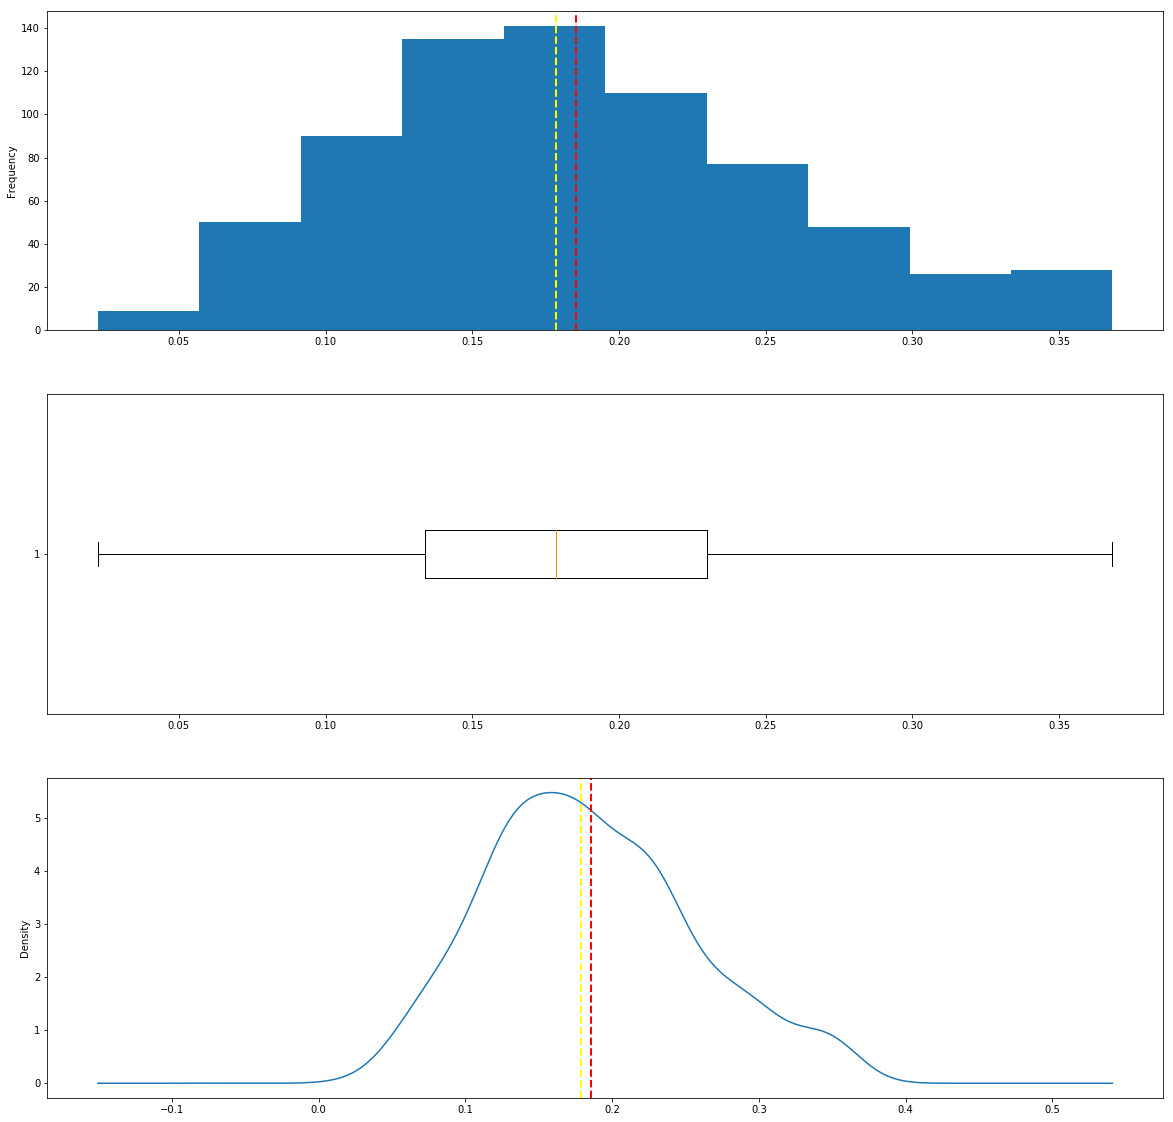

In [9]:
numerical_features = ['windspeed']
for feature in numerical_features:
    print('For feature:', feature.upper())
    fig, axis = plt.subplots(3, 1, figsize=(20, 20))
    
    # histogram on axis 0
    axis[0].hist(bike_df[feature][bike_df[feature]<0.37])
    axis[0].set_ylabel('Frequency')
    
    # mean, median plot on axis 0
    axis[0].axvline(bike_df[feature][bike_df[feature]<0.37].mean(), color='red', linestyle='dashed', linewidth=2)
    axis[0].axvline(bike_df[feature][bike_df[feature]<0.37].median(), color='yellow', linestyle='dashed', linewidth=2)
    
    # box plot on axis 1
    axis[1].boxplot(bike_df[feature][bike_df[feature]<0.37], vert=False)
    
    # density plot on axis 2
    axis[2] = bike_df[feature][bike_df[feature]<0.37].plot.density()
    axis[2].axvline(bike_df[feature][bike_df[feature]<0.37].mean(), color='red', linestyle='dashed', linewidth=2)
    axis[2].axvline(bike_df[feature][bike_df[feature]<0.37].median(), color='yellow', linestyle='dashed', linewidth=2)
    
    plt.show()

In [10]:
bike_df1 = bike_df[bike_df['hum']>0.2]
bike_df1

,instant,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,rentals
0,1,1,1,1,0,6,0,2,0.344167,0.805833,0.160446,331
1,2,2,1,1,0,0,0,2,0.363478,0.696087,0.248539,131
2,3,3,1,1,0,1,1,1,0.196364,0.437273,0.248309,120
3,4,4,1,1,0,2,1,1,0.200000,0.590435,0.160296,108
4,5,5,1,1,0,3,1,1,0.226957,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27,1,12,0,4,1,2,0.254167,0.652917,0.350133,247
727,728,28,1,12,0,5,1,2,0.253333,0.590000,0.155471,644
728,729,29,1,12,0,6,0,2,0.253333,0.752917,0.124383,159
729,730,30,1,12,0,0,0,1,0.255833,0.483333,0.350754,364


In [11]:
bike_df2 = bike_df1[bike_df1['windspeed']<0.37]
bike_df2

,instant,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,rentals
0,1,1,1,1,0,6,0,2,0.344167,0.805833,0.160446,331
1,2,2,1,1,0,0,0,2,0.363478,0.696087,0.248539,131
2,3,3,1,1,0,1,1,1,0.196364,0.437273,0.248309,120
3,4,4,1,1,0,2,1,1,0.200000,0.590435,0.160296,108
4,5,5,1,1,0,3,1,1,0.226957,0.436957,0.186900,82
...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,27,1,12,0,4,1,2,0.254167,0.652917,0.350133,247
727,728,28,1,12,0,5,1,2,0.253333,0.590000,0.155471,644
728,729,29,1,12,0,6,0,2,0.253333,0.752917,0.124383,159
729,730,30,1,12,0,0,0,1,0.255833,0.483333,0.350754,364


In [12]:
bike_df2.isnull().sum()

instant       0
dteday        0
season        0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
hum           0
windspeed     0
rentals       0
dtype: int64

For feature: RENTALS


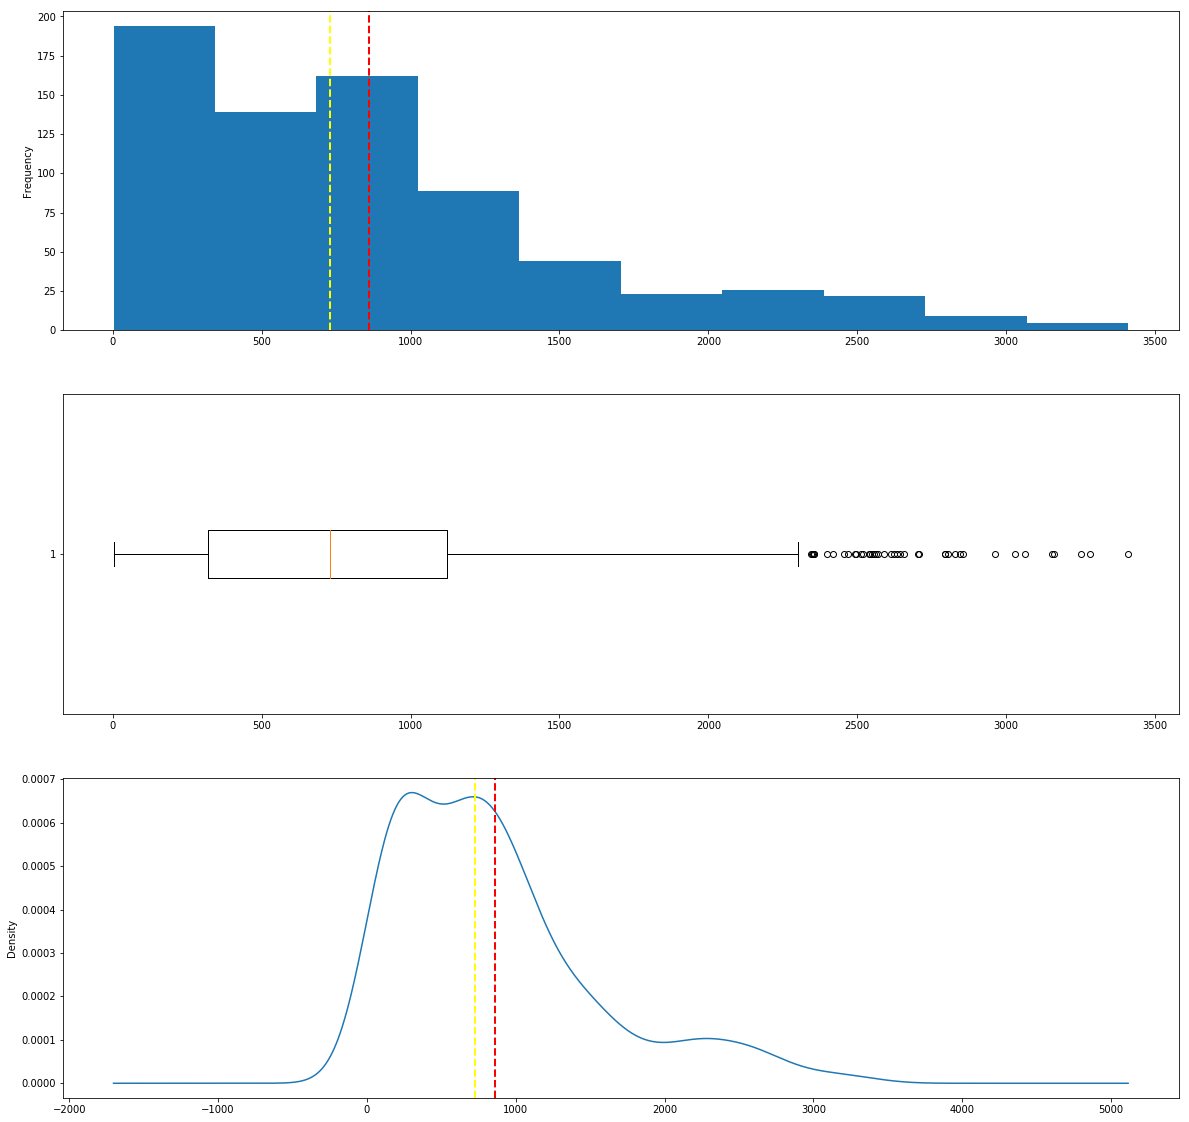

In [13]:
numerical_features = ['rentals']
for feature in numerical_features:
    print('For feature:', feature.upper())
    fig, axis = plt.subplots(3, 1, figsize=(20, 20))
    
    # histogram on axis 0
    axis[0].hist(bike_df2[feature])
    axis[0].set_ylabel('Frequency')
    
    # mean, median plot on axis 0
    axis[0].axvline(bike_df2[feature].mean(), color='red', linestyle='dashed', linewidth=2)
    axis[0].axvline(bike_df2[feature].median(), color='yellow', linestyle='dashed', linewidth=2)
    
    # box plot on axis 1
    axis[1].boxplot(bike_df2[feature], vert=False)
    
    # density plot on axis 2
    axis[2] = bike_df2[feature].plot.density()
    axis[2].axvline(bike_df2[feature].mean(), color='red', linestyle='dashed', linewidth=2)
    axis[2].axvline(bike_df2[feature].median(), color='yellow', linestyle='dashed', linewidth=2)
    
    plt.show()

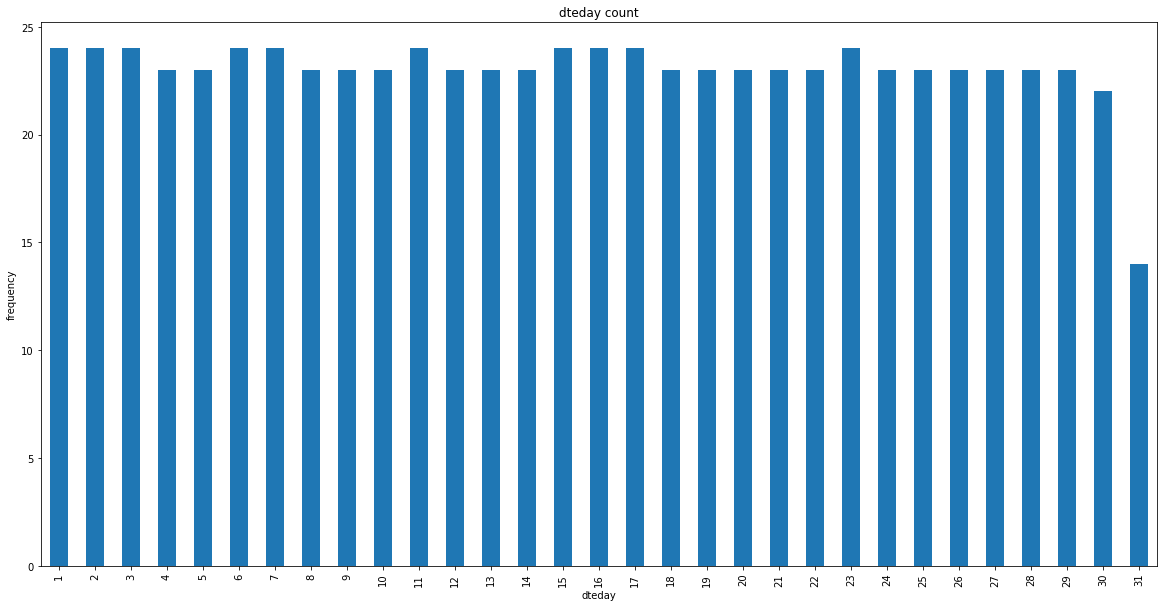

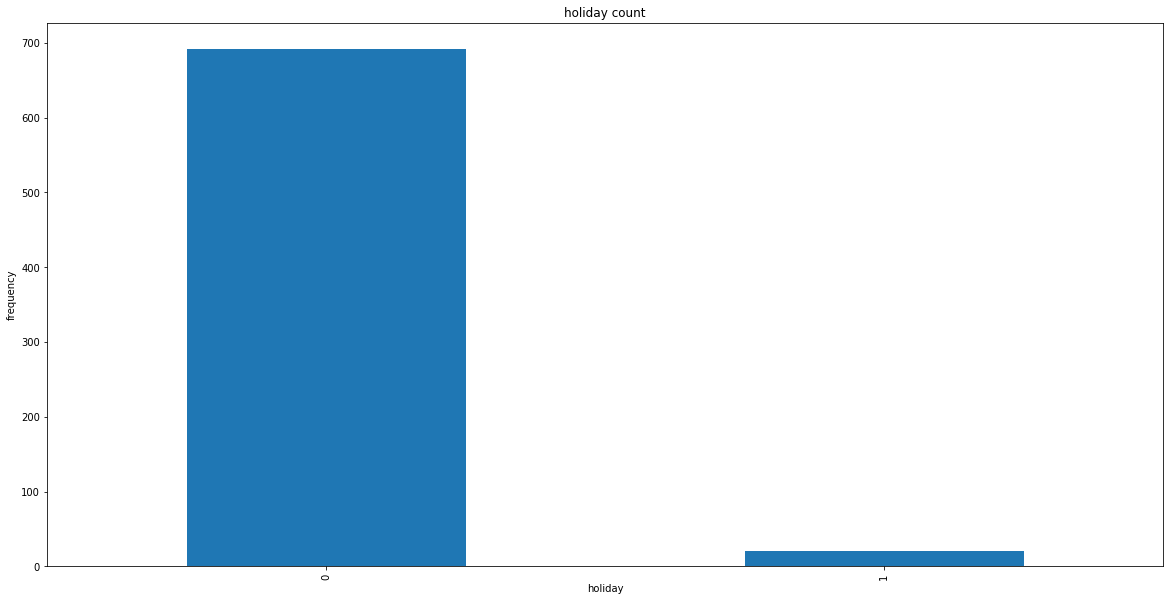

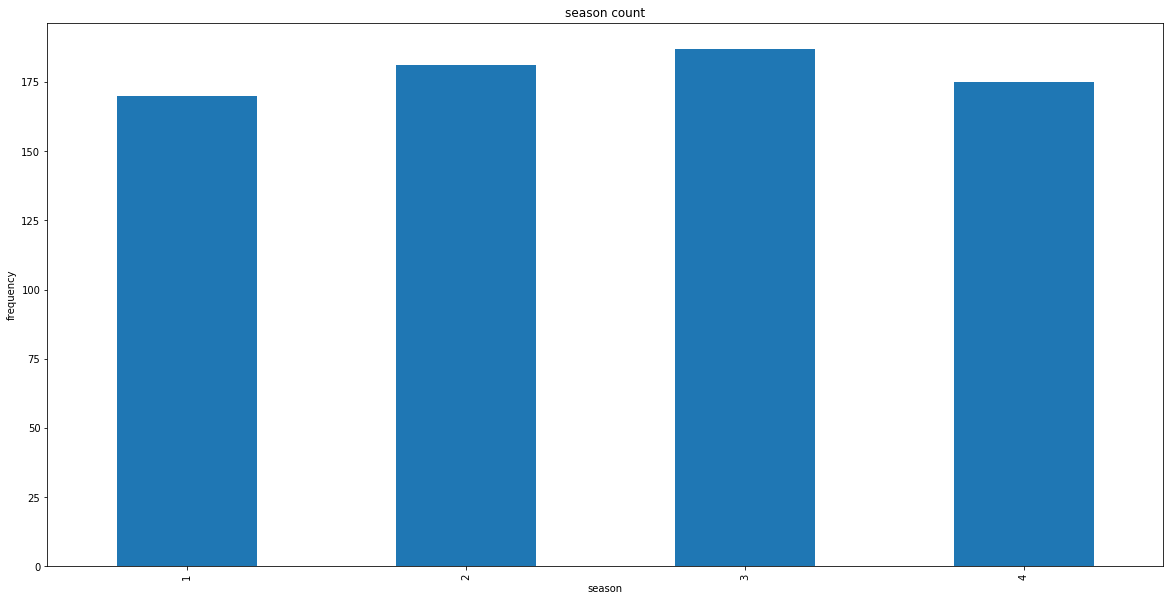

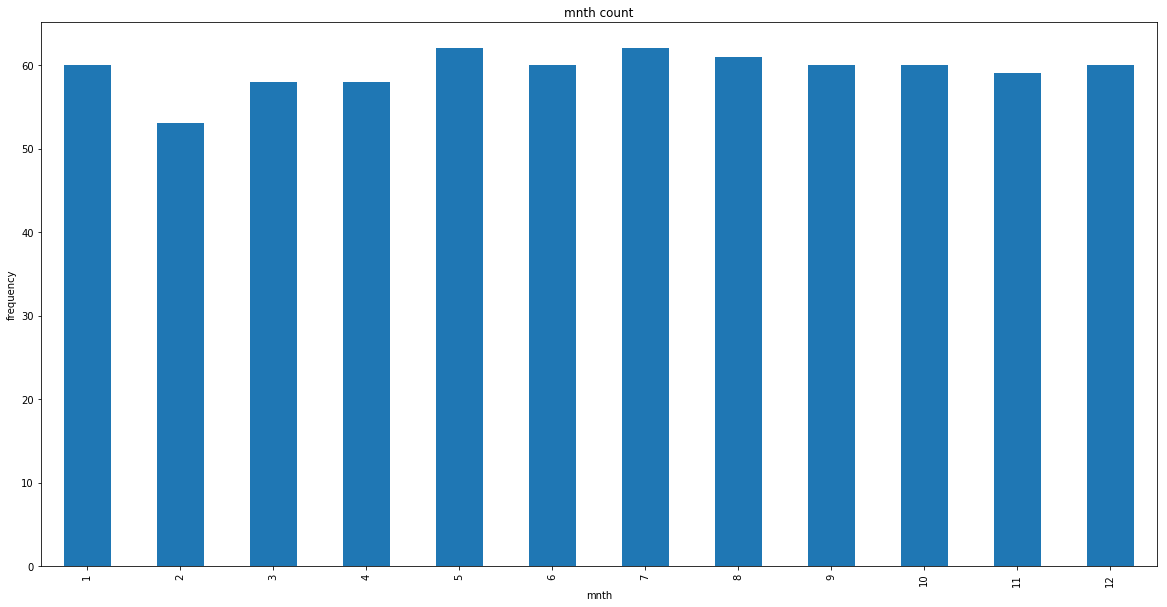

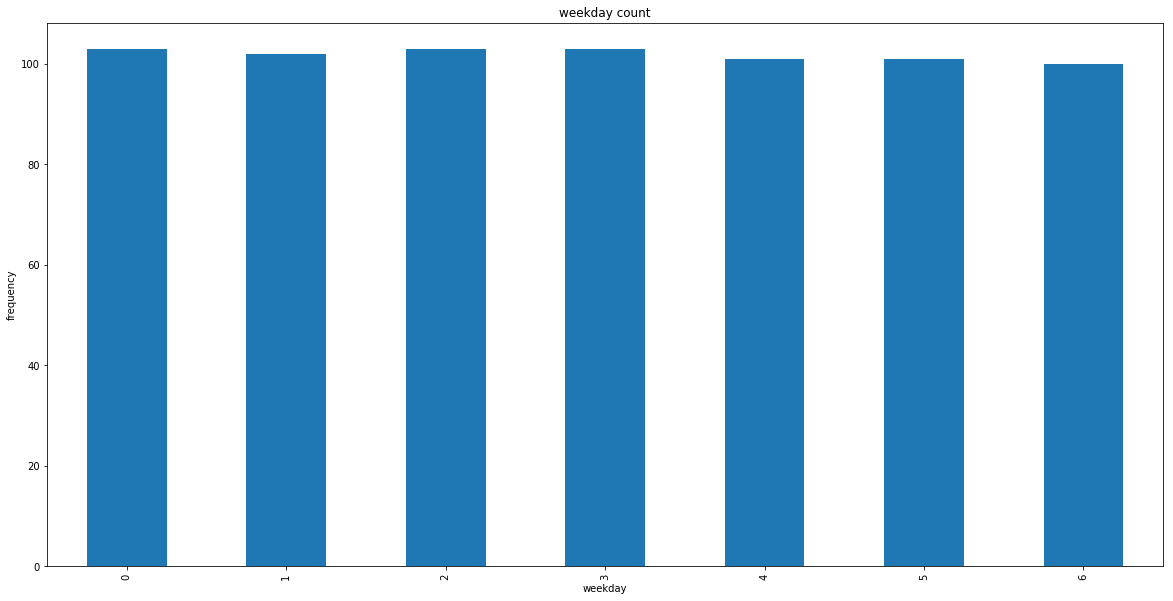

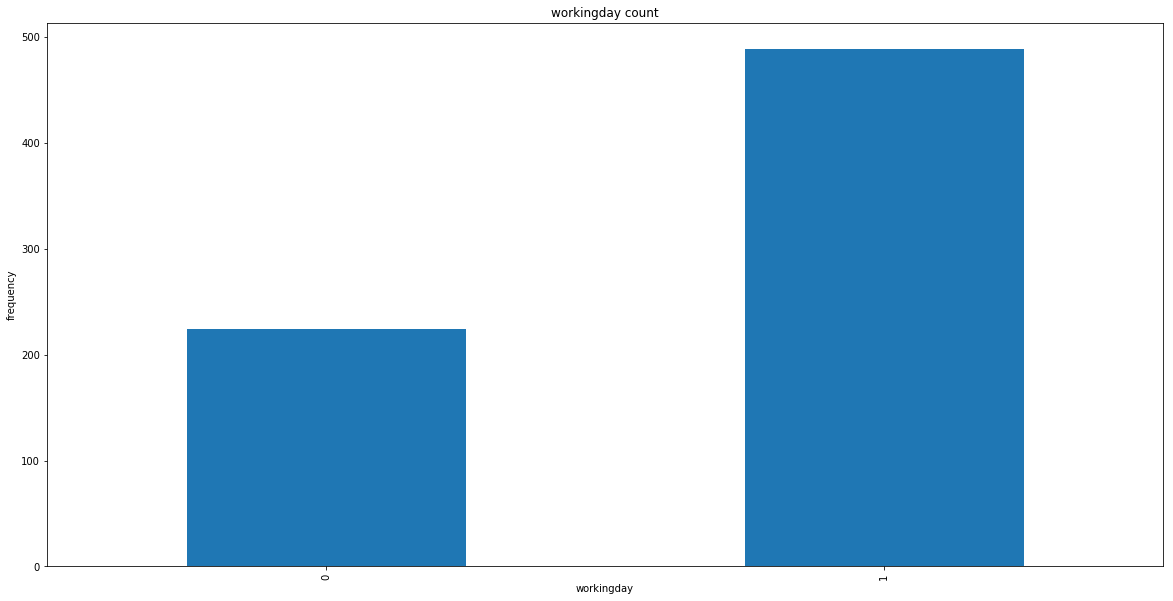

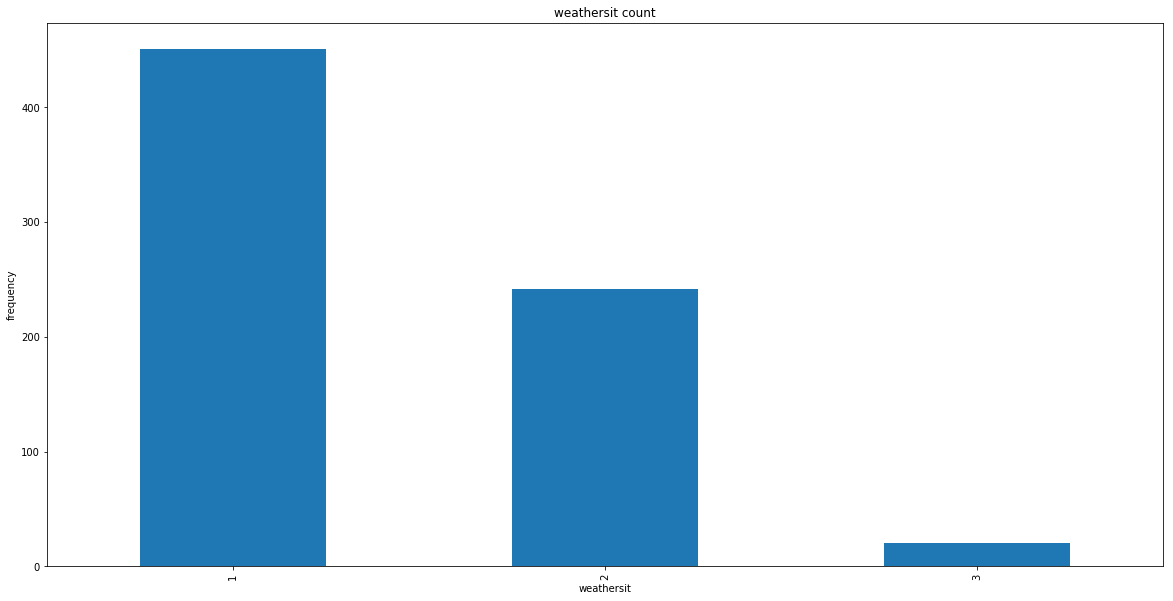

In [14]:
categorical_features = ['dteday', 'holiday', 'season', 'mnth', 'weekday', 'workingday', 'weathersit']
for feature in categorical_features:
    counts = bike_df2[feature].value_counts().sort_index()
    plt.figure(figsize=(20, 10))
    counts.plot.bar()
    plt.title(feature + ' count')
    plt.xlabel(feature)
    plt.ylabel('frequency')
    plt.show()

In [15]:
map_ = bike_df2[['temp', 'hum', 'windspeed', 'rentals']]
correlation_map = map_.corr()

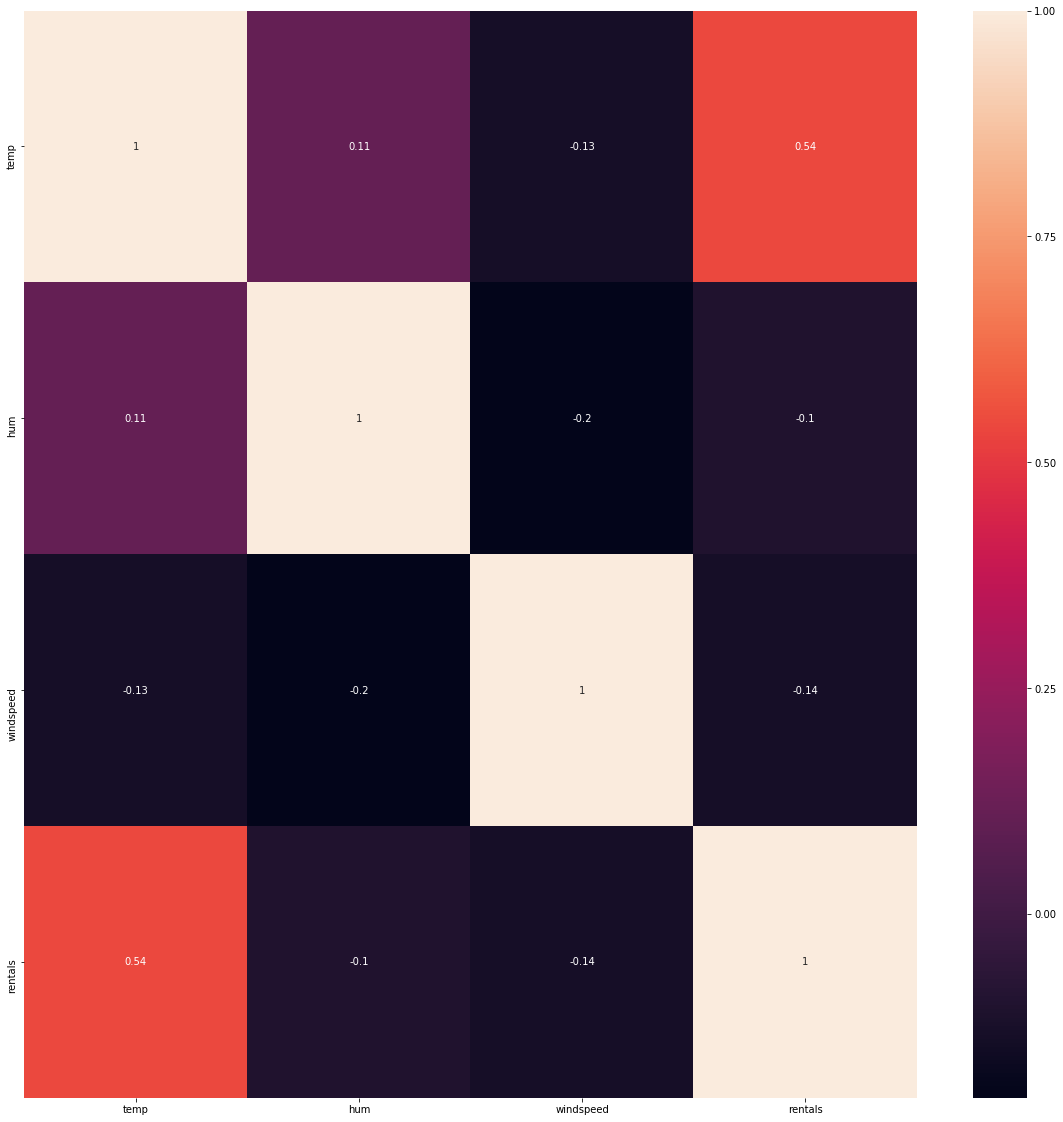

In [16]:
plt.figure(figsize=(20, 20))
corr_plot = sns.heatmap(correlation_map, annot=True)
plt.show()

For feature:  DTEDAY


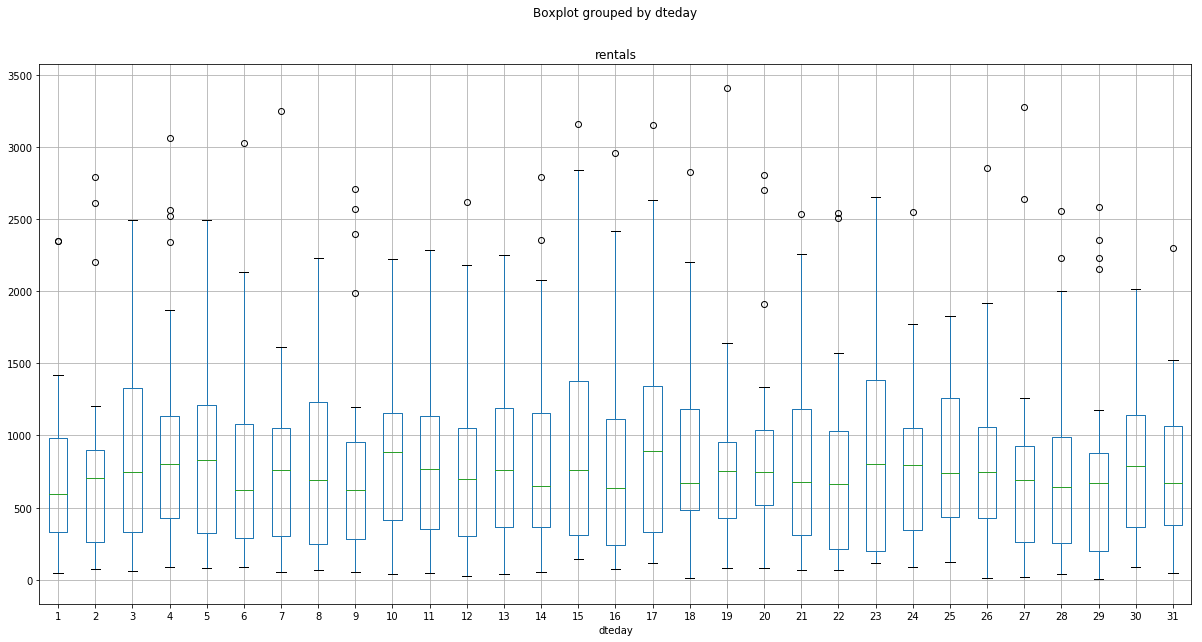

For feature:  HOLIDAY


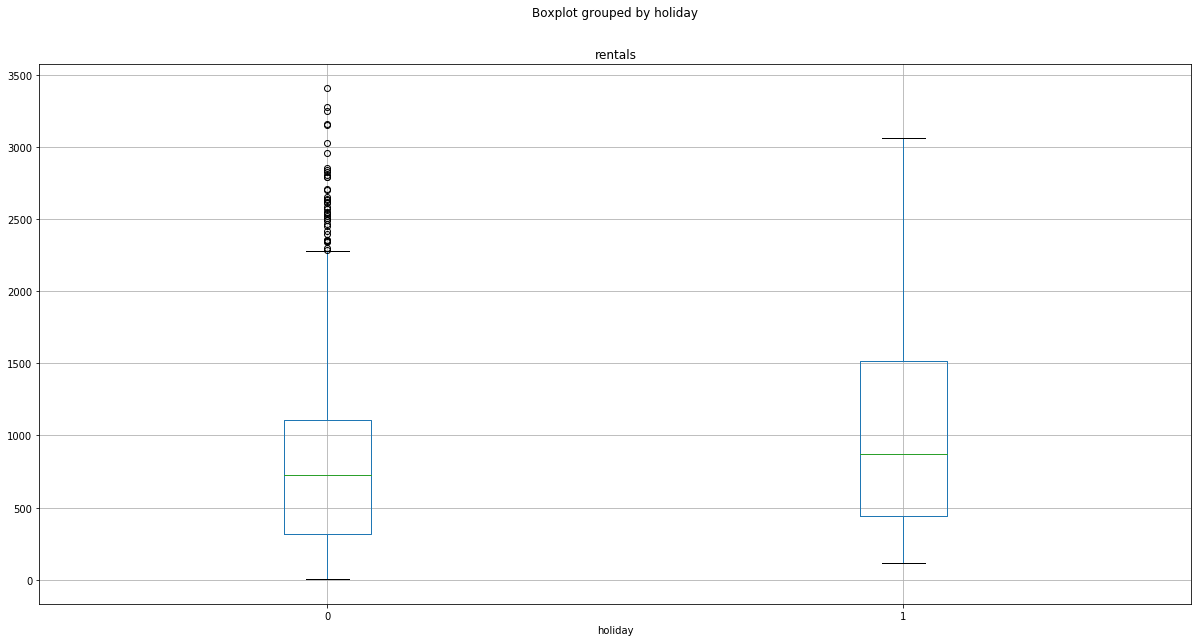

For feature:  SEASON


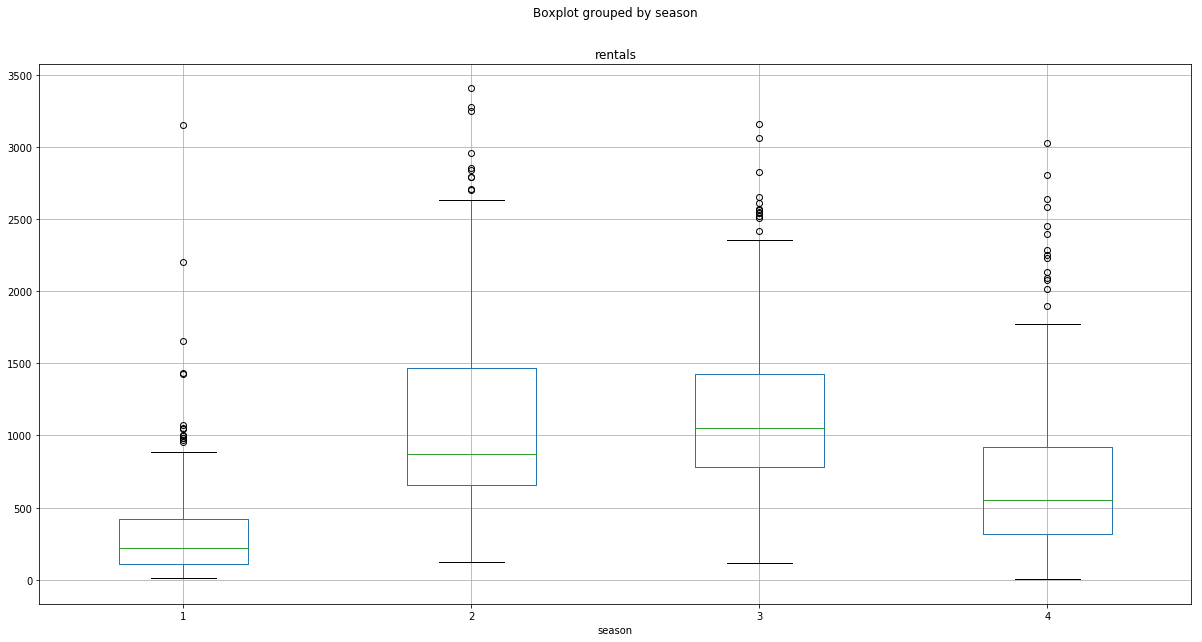

For feature:  MNTH


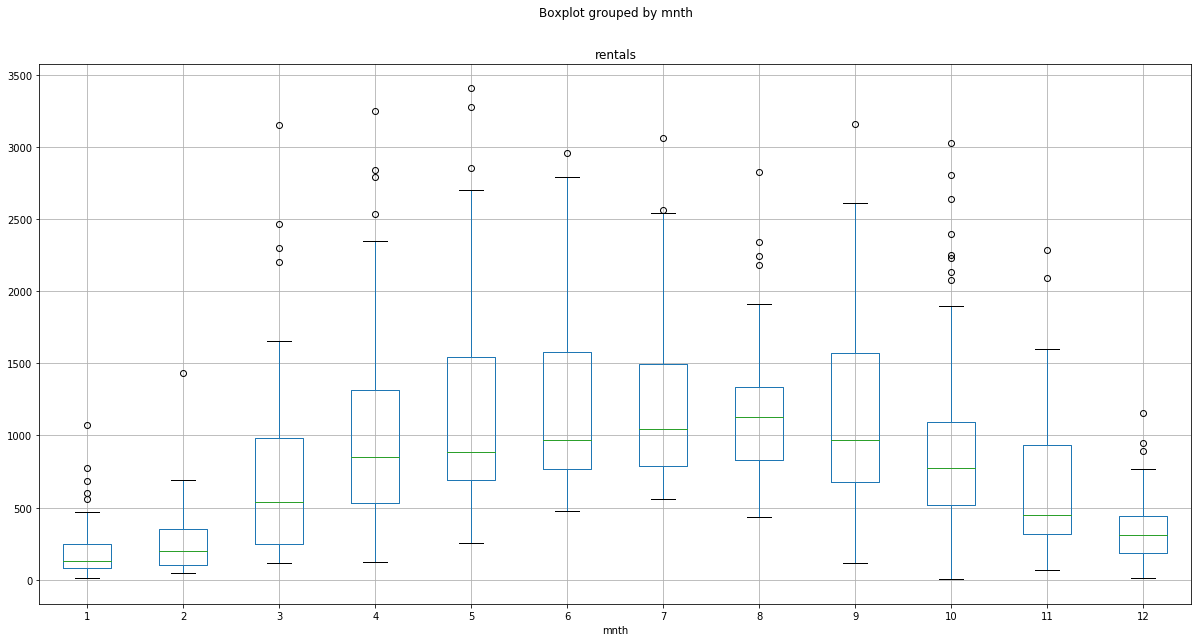

For feature:  WEEKDAY


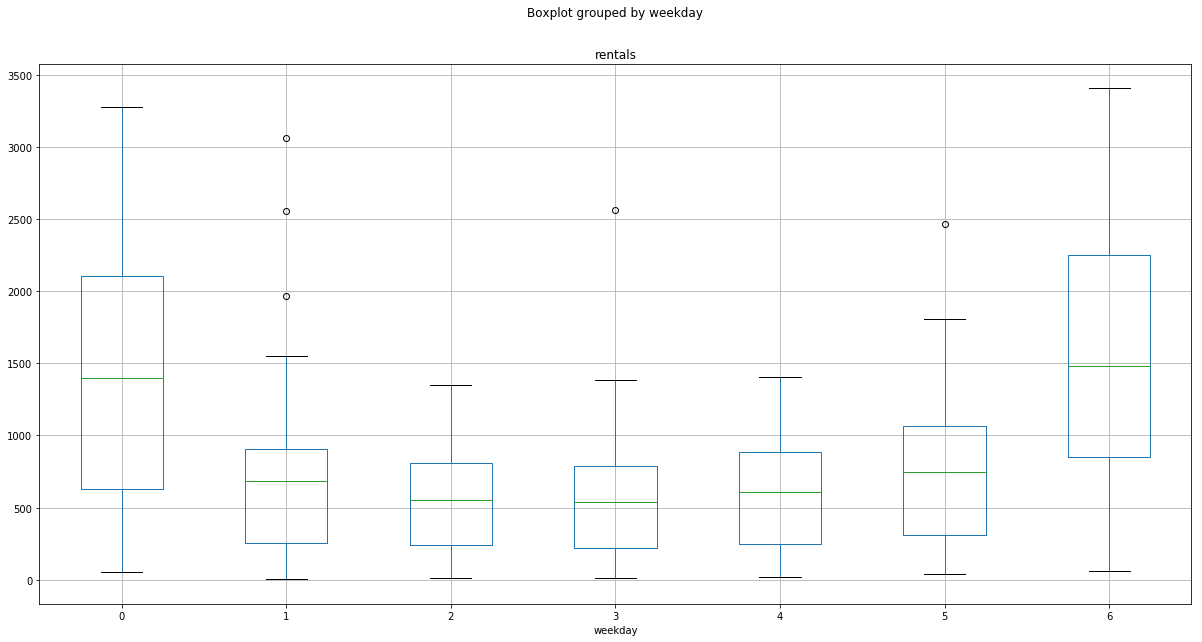

For feature:  WORKINGDAY


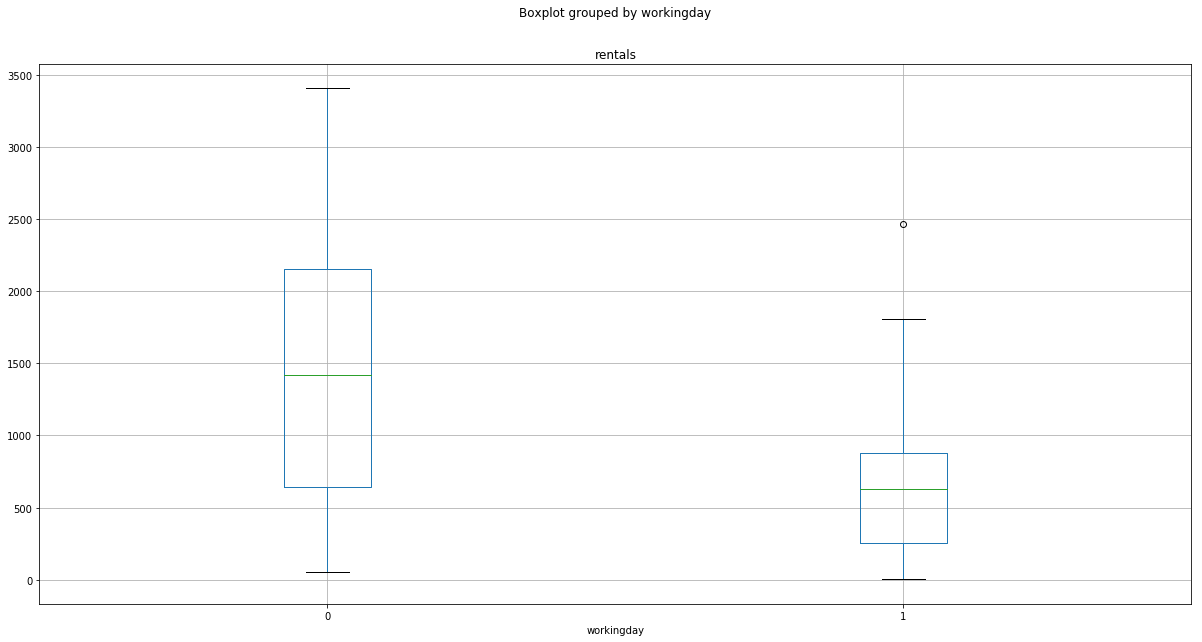

For feature:  WEATHERSIT


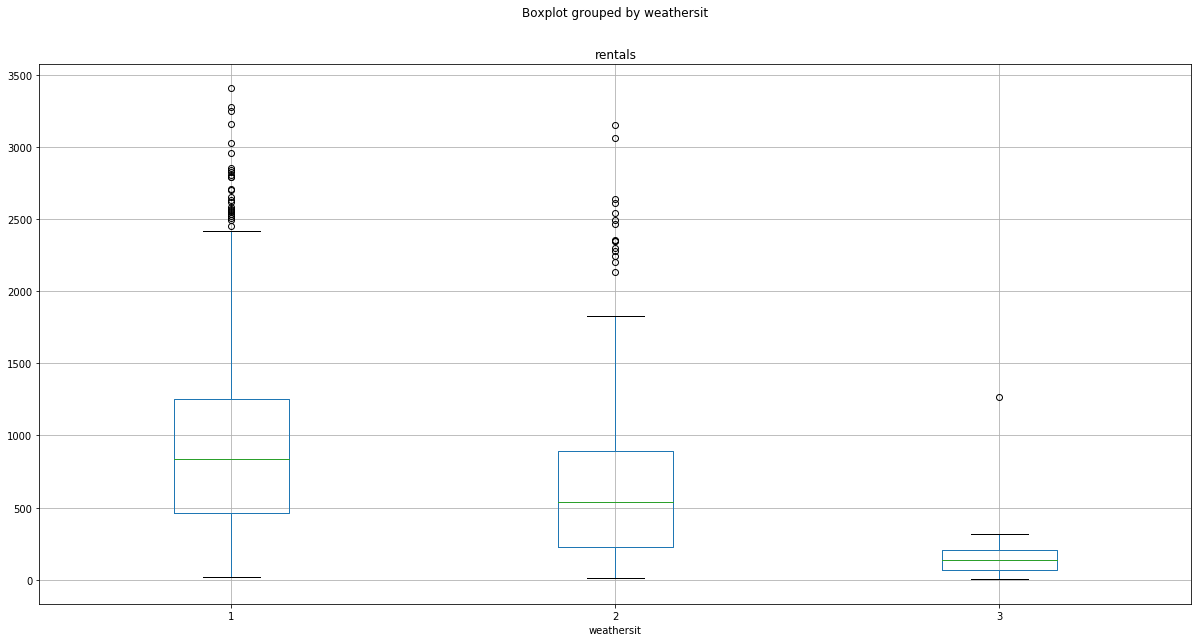

In [17]:
for feature in categorical_features:
    print('For feature: ', feature.upper())
    bike_df2.boxplot(['rentals'], by=feature, figsize=(20, 10))
    plt.show()

In [18]:
features = ['temp', 'weathersit', 'workingday', 'weekday', 'mnth', 'season']

In [19]:
# Create our dataset
X, Y = bike_df2[features].values, bike_df2.rentals.values
print('Features:',X[:10], '\nLabels:', Y[:10], sep='\n')

Features:
[[0.344167 2.       0.       6.       1.       1.      ]
 [0.363478 2.       0.       0.       1.       1.      ]
 [0.196364 1.       1.       1.       1.       1.      ]
 [0.2      1.       1.       2.       1.       1.      ]
 [0.226957 1.       1.       3.       1.       1.      ]
 [0.204348 1.       1.       4.       1.       1.      ]
 [0.196522 2.       1.       5.       1.       1.      ]
 [0.165    2.       0.       6.       1.       1.      ]
 [0.138333 1.       0.       0.       1.       1.      ]
 [0.150833 1.       1.       1.       1.       1.      ]]

Labels:
[331 131 120 108  82  88 148  68  54  41]


In [20]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=0)

In [21]:
print('Training set: [X, Y]', train_X.shape[0], train_Y.shape[0])

Training set: [X, Y] 499 499


In [22]:
print('Testing set: [X, Y]', test_X.shape[0], test_Y.shape[0])

Testing set: [X, Y] 214 214


In [23]:
lr = LinearRegression()

In [29]:
# Training model
model = lr.fit(train_X, train_Y)
print(model)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


In [30]:
# Testing model
test_predictions = model.predict(test_X)

np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(test_predictions)[:10])
print('Actual labels   : ' ,test_Y[:10])

Predicted labels:  [ 156. 1849.  410.  911.  621. 1350.  -17.  -44. 1086.  142.]
Actual labels   :  [ 143 2001  204  775 1014 2229  115   47  599  168]


Lets look at the trend of the predicted values with actual values along with a trend line

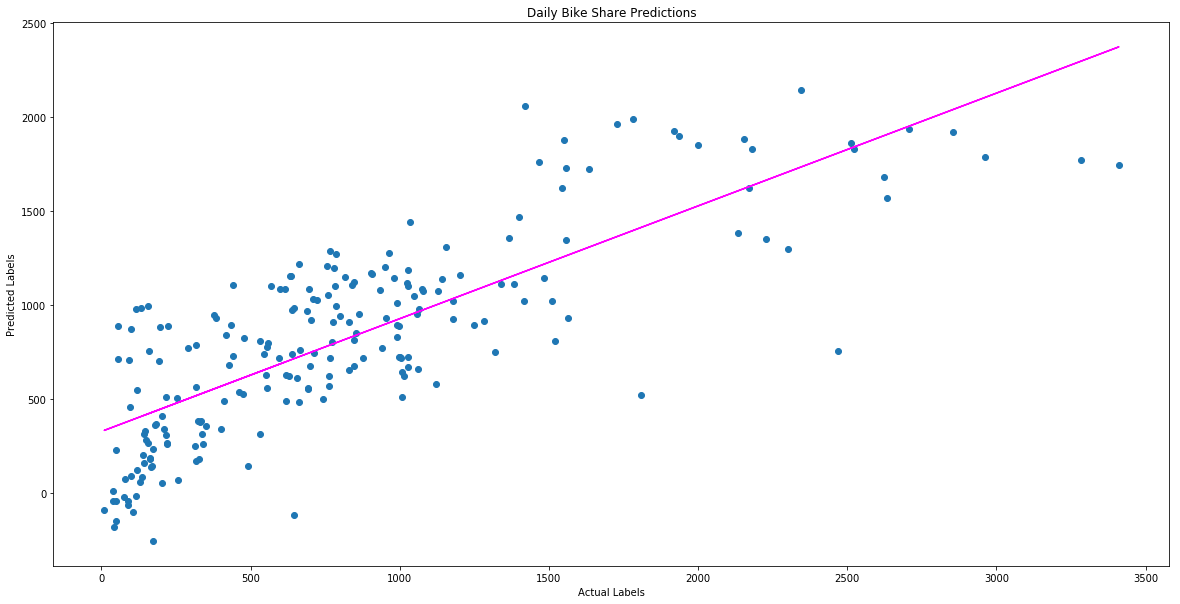

In [31]:
plt.figure(figsize=(20, 10))
plt.scatter(test_Y, test_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

z = np.polyfit(test_Y, test_predictions, 1)
p = np.poly1d(z)
plt.plot(test_Y, p(test_Y), color='magenta')

plt.show()

We can see alot of residual between the values and the trend line, we can actually calculated these residuals which then can be used to determine the accuarcy of the model

## Residual measure
1. **Mean squared error [MSE]** : The mean of the squared diffferences between the actual value and predicted value. The smaller the better the fit.
2. **Root mean squared error [RMSE]** : The root of the mean of squared differences between actual and predicted value. Compared to MSE error, these are scaled to the unit of the predicted feature (in our case # of rentals). The smaller the value the better the fit.
3. **Coefficient of determination** : This value determines how much of the variance between the predicted value and the actual vaue is the model able to explain. The higher value determines better fit.

In [59]:
mse_error = mean_squared_error(test_Y, test_predictions)
rmse_error = np.sqrt(mse_error)
r2_score_ = r2_score(test_Y, test_predictions)

In [65]:
print('MSE:', round(mse_error, 2), ', RMSE:', round(rmse_error, 2), ', R2 score:', round(r2_score_, 2))

MSE: 176880.3 , RMSE: 420.57 , R2 score: 0.63


Now, let's look at some other regression techniques we can use

## Lasso regression

In [66]:
lasso = Lasso()

In [67]:
model = lasso.fit(train_X, train_Y)
print(model)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
      normalize=False, positive=False, precompute=False, random_state=None,
      selection='cyclic', tol=0.0001, warm_start=False)


In [68]:
test_predictions = model.predict(test_X)

np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(test_predictions)[:10])
print('Actual labels   : ' ,test_Y[:10])

Predicted labels:  [ 168. 1839.  415.  908.  621. 1347.   -8.  -34. 1085.  149.]
Actual labels   :  [ 143 2001  204  775 1014 2229  115   47  599  168]


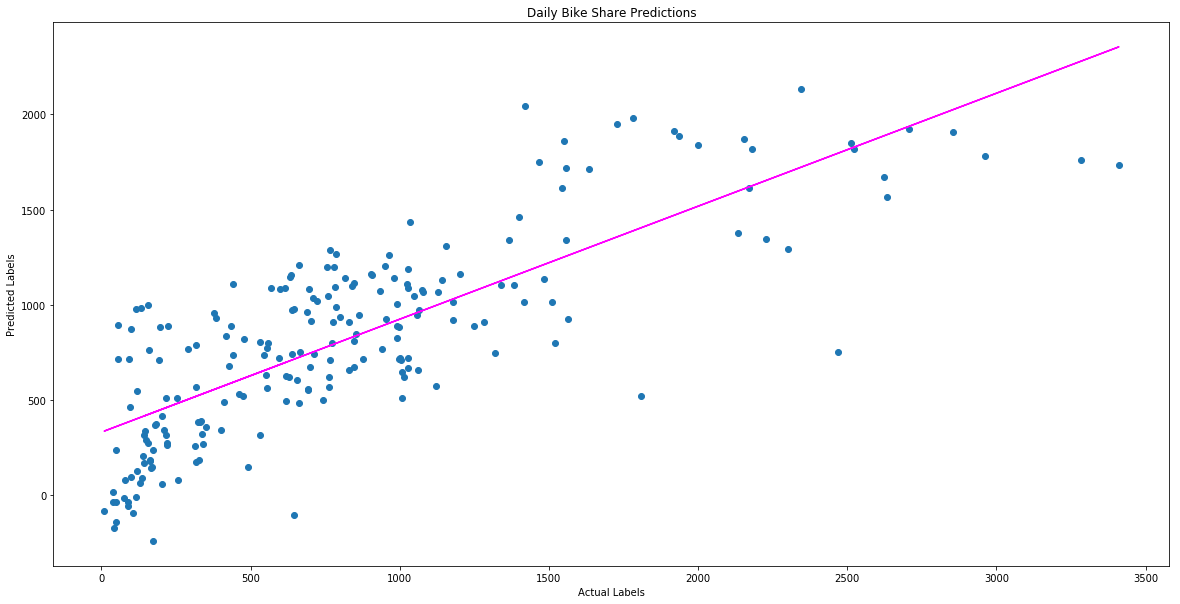

In [69]:
plt.figure(figsize=(20, 10))
plt.scatter(test_Y, test_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

z = np.polyfit(test_Y, test_predictions, 1)
p = np.poly1d(z)
plt.plot(test_Y, p(test_Y), color='magenta')

plt.show()

In [71]:
mse_error = mean_squared_error(test_Y, test_predictions)
rmse_error = np.sqrt(mse_error)
r2_score_ = r2_score(test_Y, test_predictions)

print('MSE:', round(mse_error, 2), ', RMSE:', round(rmse_error, 2), ', R2 score:', round(r2_score_, 2))

MSE: 177624.01 , RMSE: 421.45 , R2 score: 0.62


We, see similar score using the default values for lasso regression

## Decision tree regressor

In [72]:
tr = DecisionTreeRegressor()

In [73]:
model = tr.fit(train_X, train_Y)
print(model)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')


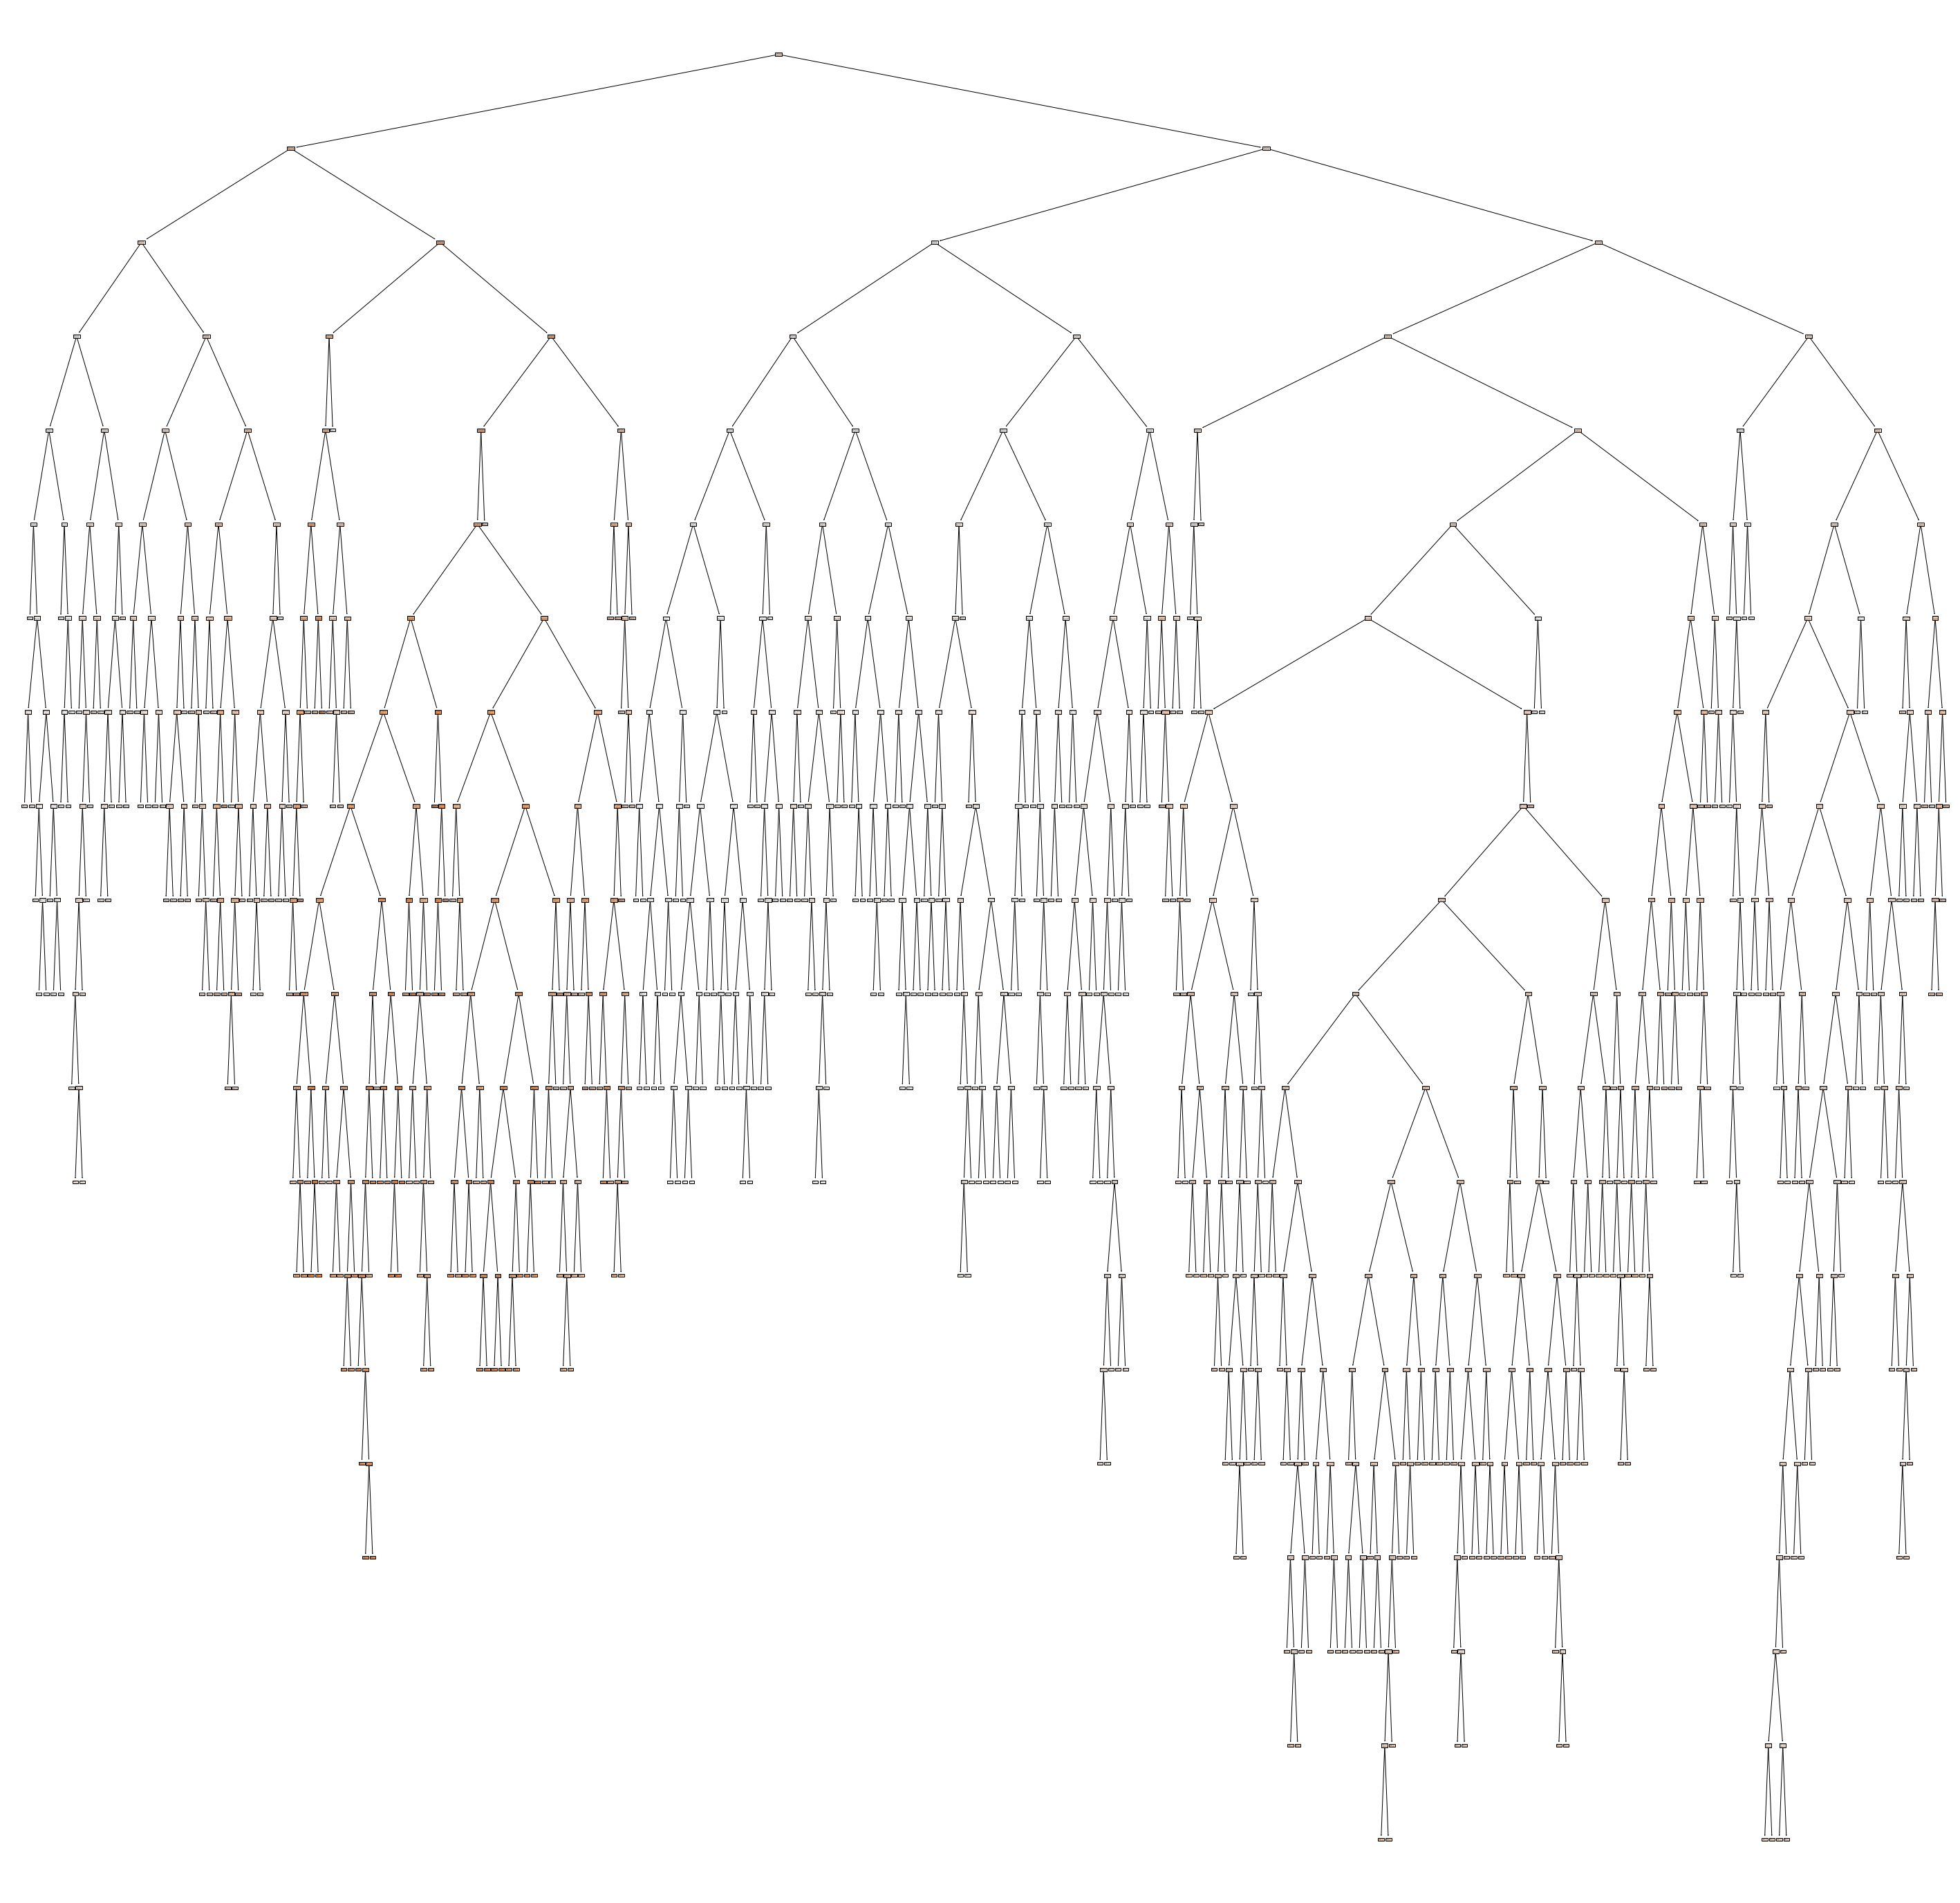

In [74]:
# Lets visualize the tree
plt.figure(figsize=(50, 50))
_ = tree_.plot_tree(tr, feature_names=features, filled=True)

The created tree is huge. Let's see how it performs on predictions

In [75]:
test_predictions = model.predict(test_X)

np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(test_predictions)[:10])
print('Actual labels   : ' ,test_Y[:10])

Predicted labels:  [ 300. 1198.  315. 1077. 1252.  642.  148.   61.  397.  203.]
Actual labels   :  [ 143 2001  204  775 1014 2229  115   47  599  168]


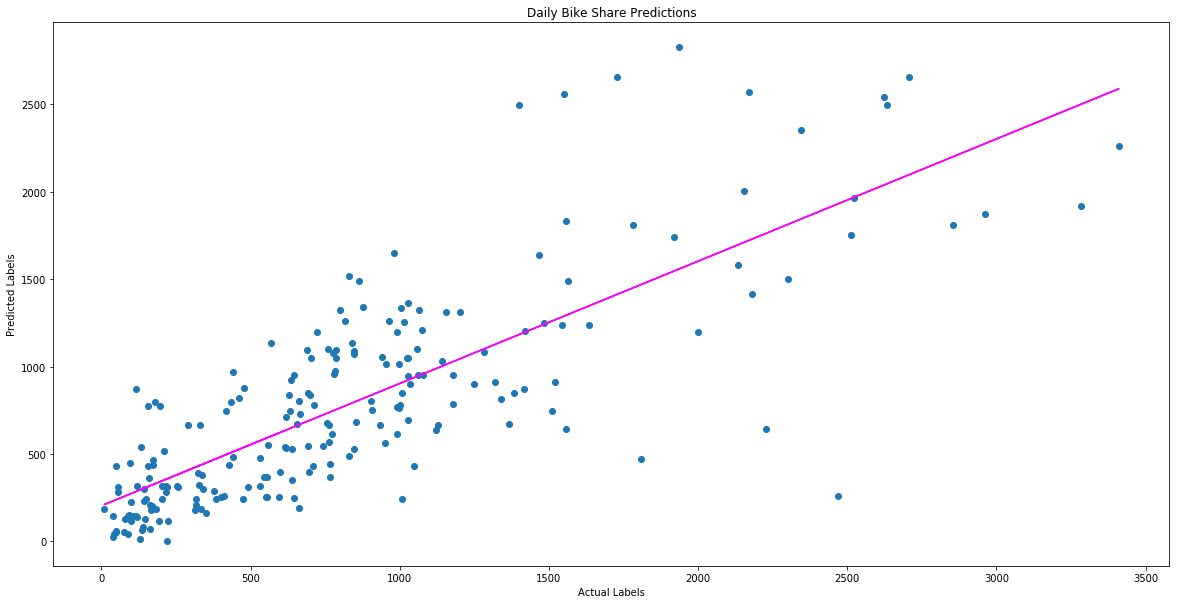

In [77]:
plt.figure(figsize=(20, 10))
plt.scatter(test_Y, test_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

z = np.polyfit(test_Y, test_predictions, 1)
p = np.poly1d(z)
plt.plot(test_Y, p(test_Y), color='magenta')

plt.show()

In [78]:
mse_error = mean_squared_error(test_Y, test_predictions)
rmse_error = np.sqrt(mse_error)
r2_score_ = r2_score(test_Y, test_predictions)

print('MSE:', round(mse_error, 2), ', RMSE:', round(rmse_error, 2), ', R2 score:', round(r2_score_, 2))

MSE: 179900.4 , RMSE: 424.15 , R2 score: 0.62


## Ensemble algorithm 

1. Random forest regressor
2. Boosting regressor

In [79]:
# Random forest regressor
random_forest = RandomForestRegressor()

In [80]:
model = random_forest.fit(train_X, train_Y)

C:\Users\Pranav Khekare\AppData\Roaming\Python\Python36\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [81]:
print(model)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)


In [82]:
test_predictions = model.predict(test_X)

np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(test_predictions)[:10])
print('Actual labels   : ' ,test_Y[:10])

Predicted labels:  [ 281. 2010.  460.  916. 1026. 1378.  136.   54.  895.  238.]
Actual labels   :  [ 143 2001  204  775 1014 2229  115   47  599  168]


In [83]:
mse_error = mean_squared_error(test_Y, test_predictions)
rmse_error = np.sqrt(mse_error)
r2_score_ = r2_score(test_Y, test_predictions)

print('MSE:', round(mse_error, 2), ', RMSE:', round(rmse_error, 2), ', R2 score:', round(r2_score_, 2))

MSE: 112469.5 , RMSE: 335.36 , R2 score: 0.76


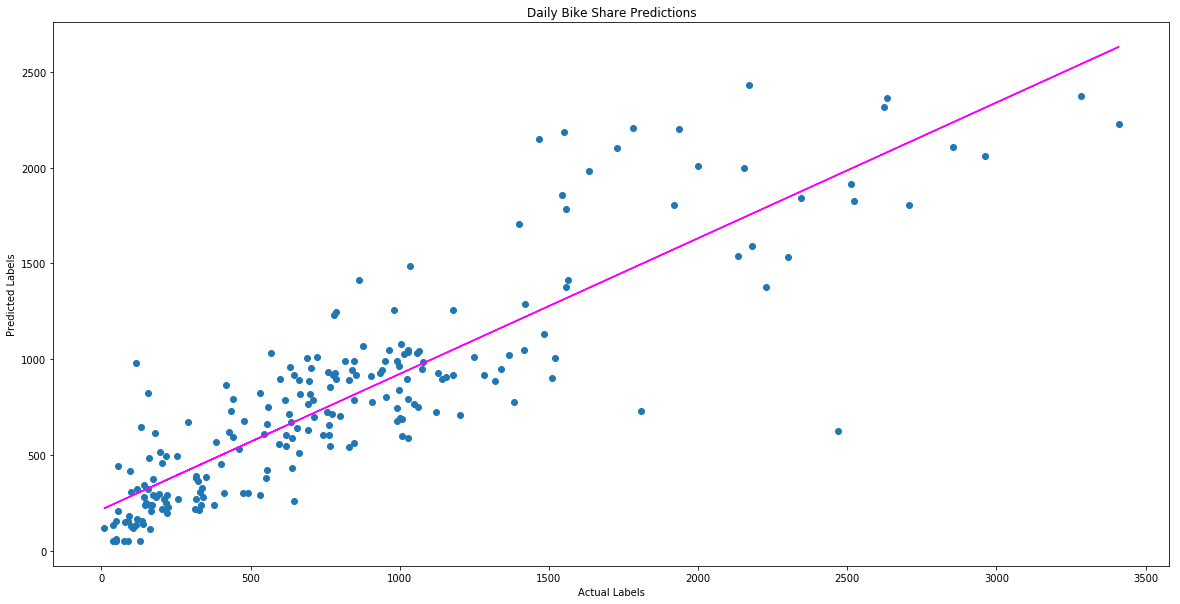

In [84]:
plt.figure(figsize=(20, 10))
plt.scatter(test_Y, test_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

z = np.polyfit(test_Y, test_predictions, 1)
p = np.poly1d(z)
plt.plot(test_Y, p(test_Y), color='magenta')

plt.show()

In [85]:
# Gradient boosting regressor
boost_regressor = GradientBoostingRegressor()

In [86]:
model = boost_regressor.fit(train_X, train_Y)
print(model)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=1, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=100,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [87]:
test_predictions = model.predict(test_X)

np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(test_predictions)[:10])
print('Actual labels   : ' ,test_Y[:10])

Predicted labels:  [ 199. 2214.  346.  910.  883. 1624.   90.   73.  768.  299.]
Actual labels   :  [ 143 2001  204  775 1014 2229  115   47  599  168]


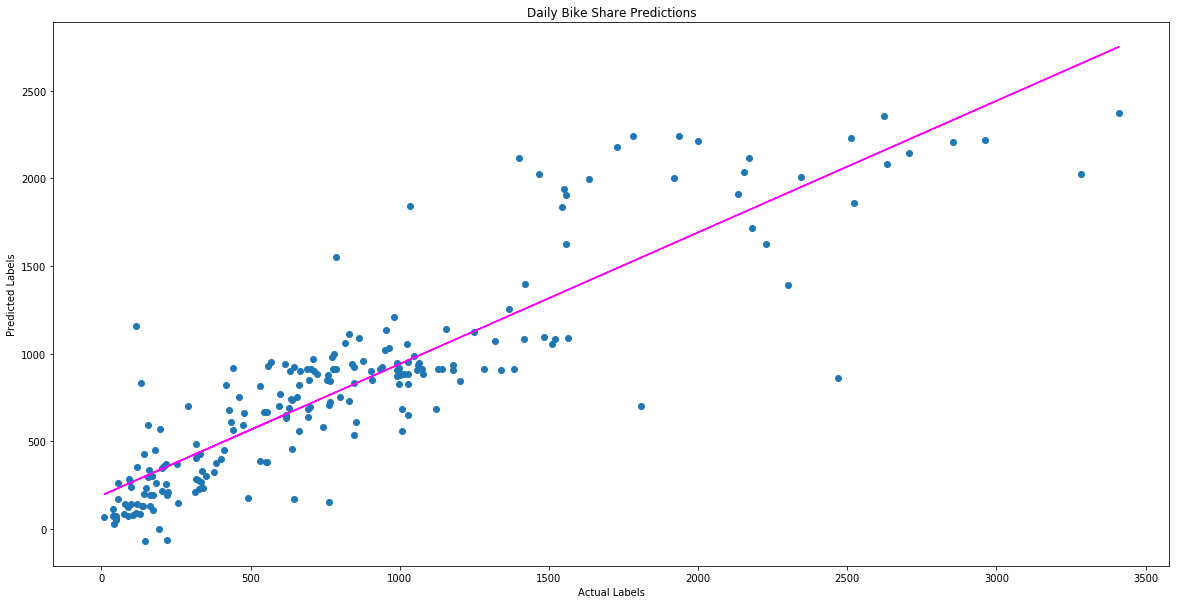

In [88]:
plt.figure(figsize=(20, 10))
plt.scatter(test_Y, test_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

z = np.polyfit(test_Y, test_predictions, 1)
p = np.poly1d(z)
plt.plot(test_Y, p(test_Y), color='magenta')

plt.show()

In [89]:
mse_error = mean_squared_error(test_Y, test_predictions)
rmse_error = np.sqrt(mse_error)
r2_score_ = r2_score(test_Y, test_predictions)

print('MSE:', round(mse_error, 2), ', RMSE:', round(rmse_error, 2), ', R2 score:', round(r2_score_, 2))

MSE: 104112.05 , RMSE: 322.66 , R2 score: 0.78


## Use Grid search CV to optimize parameters

In [91]:
# Gradient boosting regressor for GridsearchCV
boost_regressor = GradientBoostingRegressor()

In [93]:
# Determine the hyperparameters to tune
hyper_params = {
    'learning_rate': [0.1, 0.5, 1.0],
    'min_samples_leaf': [1, 3, 5, 10, 15],
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 5, 7]
}

In [94]:
# Determine the score to optimize
score = make_scorer(r2_score)

In [95]:
grid_search = GridSearchCV(boost_regressor, hyper_params, 
                           scoring=score, cv=5, 
                           return_train_score=True)

In [96]:
grid_search.fit(train_X, train_Y)
print('The best hyper parameters are:', grid_search.best_params_, '\n')

The best hyper parameters are: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 3, 'n_estimators': 50} 



C:\Users\Pranav Khekare\AppData\Roaming\Python\Python36\site-packages\sklearn\model_selection\_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [97]:
model = grid_search.best_estimator_
print(model)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
                          learning_rate=0.1, loss='ls', max_depth=3,
                          max_features=None, max_leaf_nodes=None,
                          min_impurity_decrease=0.0, min_impurity_split=None,
                          min_samples_leaf=3, min_samples_split=2,
                          min_weight_fraction_leaf=0.0, n_estimators=50,
                          n_iter_no_change=None, presort='auto',
                          random_state=None, subsample=1.0, tol=0.0001,
                          validation_fraction=0.1, verbose=0, warm_start=False)


In [98]:
test_predictions = model.predict(test_X)

np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(test_predictions)[:10])
print('Actual labels   : ' ,test_Y[:10])

Predicted labels:  [ 266. 2209.  353.  902.  885. 1499.   95.  107.  769.  316.]
Actual labels   :  [ 143 2001  204  775 1014 2229  115   47  599  168]


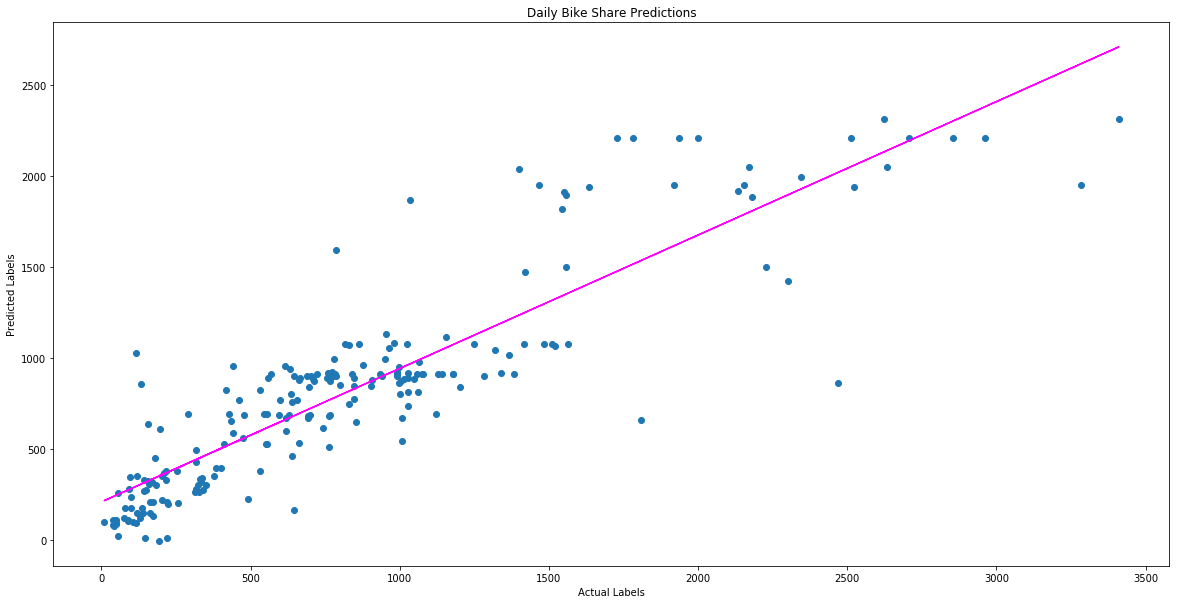

In [99]:
plt.figure(figsize=(20, 10))
plt.scatter(test_Y, test_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

z = np.polyfit(test_Y, test_predictions, 1)
p = np.poly1d(z)
plt.plot(test_Y, p(test_Y), color='magenta')

plt.show()

In [100]:
mse_error = mean_squared_error(test_Y, test_predictions)
rmse_error = np.sqrt(mse_error)
r2_score_ = r2_score(test_Y, test_predictions)

print('MSE:', round(mse_error, 2), ', RMSE:', round(rmse_error, 2), ', R2 score:', round(r2_score_, 2))

MSE: 102672.69 , RMSE: 320.43 , R2 score: 0.78


## Some pre-processing also helps

Now we have used the data as is for training and then after hyper parameter tuning and using ensemble techniques we were able to get a good r2 score of 0.78, lets see if we can push it even further by doing some data pre-processing

1. **Scaling numerical value**
    - Scaling the numerical features with different ranges to common scale range of 0-1 keeps multiple features consistent and helps model train better 
2. **Encoding categorical values**
    - Encoding categorical values for various features to unique integer values. The best way to do this is to apply on-hot encoding. 
    
Make sure that whike predicting we have to also convert the input data according to these changes to correctly predict the value. This can be done using the scikit-learn library pipelines.

In [102]:
# Lets the dataframe to deterine the nummerical and categorical features
bike_df2.head(5)

,instant,dteday,season,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,rentals
0,1,1,1,1,0,6,0,2,0.344167,0.805833,0.160446,331
1,2,2,1,1,0,0,0,2,0.363478,0.696087,0.248539,131
2,3,3,1,1,0,1,1,1,0.196364,0.437273,0.248309,120
3,4,4,1,1,0,2,1,1,0.200000,0.590435,0.160296,108
4,5,5,1,1,0,3,1,1,0.226957,0.436957,0.186900,82


In [103]:
numeric_features = [0]
categorical_features = [1, 2, 3, 4, 5]

In [106]:
# numeric transform
numeric_transform = Pipeline(steps=[('scalar', StandardScaler())])

# categorical transform
categorical_transform = Pipeline(steps=[('onehot_encode', 
                                        OneHotEncoder(handle_unknown='ignore'))])

In [107]:
# Now design the pre-processing step
pre_processor = ColumnTransformer(transformers=[
    ('num', numeric_transform, numeric_features), 
    ('cat', categorical_transform, categorical_features)
])

In [113]:
# Now create the pipeline
pipeline = Pipeline(steps=[('pre-processor', pre_processor), 
                           ('regressor', GradientBoostingRegressor(learning_rate=0.1,
                                                                  n_estimators=50,
                                                                  min_samples_leaf=3,
                                                                  max_depth=3))])

In [114]:
model = pipeline.fit(train_X, train_Y)
print(model)

Pipeline(memory=None,
         steps=[('pre-processor',
                 ColumnTransformer(n_jobs=None, remainder='drop',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('num',
                                                  Pipeline(memory=None,
                                                           steps=[('scalar',
                                                                   StandardScaler(copy=True,
                                                                                  with_mean=True,
                                                                                  with_std=True))],
                                                           verbose=False),
                                                  [0]),
                                                 ('cat',
                                                  Pipeline(memory=None,
   

In [115]:
test_predictions = model.predict(test_X)

np.set_printoptions(suppress=True)
print('Predicted labels: ', np.round(test_predictions)[:10])
print('Actual labels   : ' ,test_Y[:10])

Predicted labels:  [ 298. 2219.  331.  961.  857. 1526.  124.  146.  734.  339.]
Actual labels   :  [ 143 2001  204  775 1014 2229  115   47  599  168]


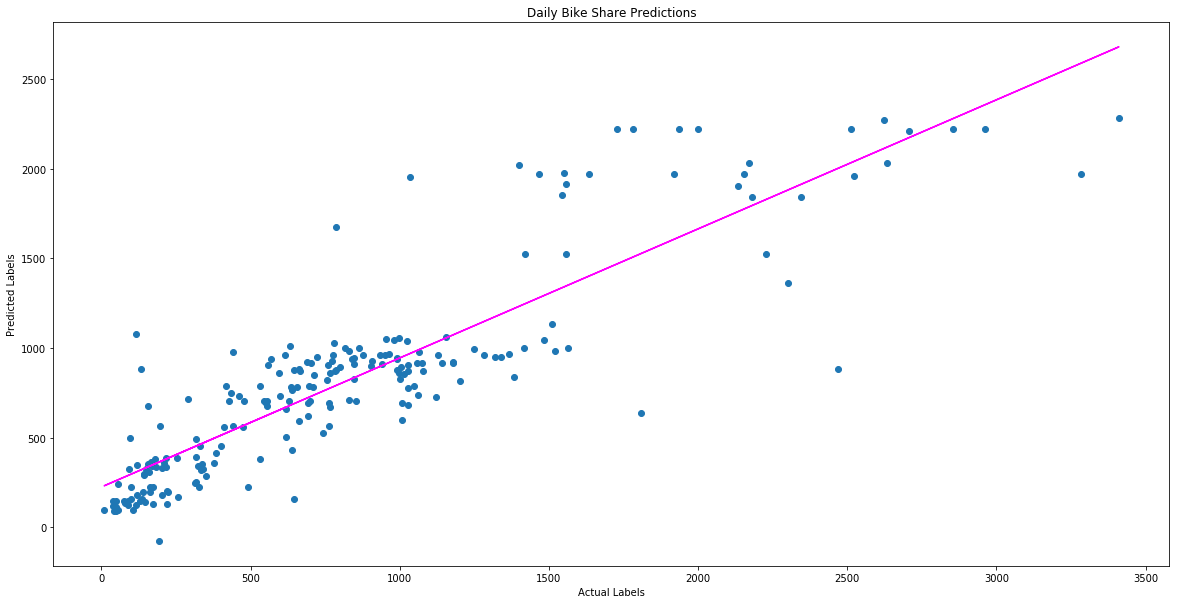

In [116]:
plt.figure(figsize=(20, 10))
plt.scatter(test_Y, test_predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')

z = np.polyfit(test_Y, test_predictions, 1)
p = np.poly1d(z)
plt.plot(test_Y, p(test_Y), color='magenta')

plt.show()

In [117]:
mse_error = mean_squared_error(test_Y, test_predictions)
rmse_error = np.sqrt(mse_error)
r2_score_ = r2_score(test_Y, test_predictions)

print('MSE:', round(mse_error, 2), ', RMSE:', round(rmse_error, 2), ', R2 score:', round(r2_score_, 2))

MSE: 109184.75 , RMSE: 330.43 , R2 score: 0.77


In [119]:
# Lets store the model
file_name = './models/bike_share_regressor.pkl'
joblib.dump(model, file_name)

['./models/bike_share_regressor.pkl']